<a href="https://colab.research.google.com/github/putrik06/Question_Answering_NLP/blob/main/Top_4_Sentence_Embedding_Techniques_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:
Firstly, import the libraries and download ‘punkt‘

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Step 2:
Then, we define our list of sentences. You can use a larger list (it is best to use a list of sentences for easier processing of each sentence)


In [ ]:
sentences = ["I ate dinner",
            "We had a three-course meal",
            "Brad came to dinner with us",
            "He loves fish tacos",
            "In the end, we all felt like we ate too much",
            "We all agreed; it was a magnificent evening"]


Step 3:
We will also keep a tokenized version of these sentences.

In [ ]:
tokenized_sent = []

for s in sentences:
  tokenized_sent.append(word_tokenize(s.lower()))

print(tokenized_sent)

[['i', 'ate', 'dinner'], ['we', 'had', 'a', 'three-course', 'meal'], ['brad', 'came', 'to', 'dinner', 'with', 'us'], ['he', 'loves', 'fish', 'tacos'], ['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much'], ['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening']]


Step 4:
Finally, we define a function which returns the cosine similarity between 2 vectors

In [ ]:
def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

Let us start by exploring the Sentence Embedding techniques one by one.

**Doc2Vec** -
Doc2Vec is an extension from Word2Vec. Doc2Vecis an unsupervised algorithm and adds on to the Word2Vec model by introducing another ‘paragraph vector’.

Step 1:
We wil use Gensim to show an example of how to use Doc2Vec. We will first import the model and other libraries and then we will build a tagged sentence corpus

In [ ]:
#  import
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data # Why do we need to tag it? Whats the purpose?

[TaggedDocument(words=['i', 'ate', 'dinner'], tags=[0]),
 TaggedDocument(words=['we', 'had', 'a', 'three-course', 'meal'], tags=[1]),
 TaggedDocument(words=['brad', 'came', 'to', 'dinner', 'with', 'us'], tags=[2]),
 TaggedDocument(words=['he', 'loves', 'fish', 'tacos'], tags=[3]),
 TaggedDocument(words=['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much'], tags=[4]),
 TaggedDocument(words=['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening'], tags=[5])]

Step 2:
We then train the model with the parameters:

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.index_to_key

# AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
# Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
# See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

['we',
 'ate',
 'dinner',
 'a',
 'all',
 'evening',
 'loves',
 'had',
 'three-course',
 'meal',
 'brad',
 'came',
 'to',
 'with',
 'us',
 'he',
 'fish',
 'magnificent',
 'tacos',
 'in',
 'the',
 'end',
 ',',
 'felt',
 'like',
 'too',
 'much',
 'agreed',
 ';',
 'it',
 'was',
 'i']

Step 3:
We now take up a new test sentence and find the top 5 most similar sentences from our data. We will also display them in order of decreasing similarity. The infer_vector method returns the vectorized form of the test sentence(including the paragraph vector). The most_similar method returns similar sentences

In [ ]:
test_doc = word_tokenize("I had pizza and pasta".lower())
test_doc_vector = model.infer_vector(test_doc)
model.dv.most_similar(positive = [test_doc_vector])

# '''
# positive = List of sentences that contribute positively.
# '''
# DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
# model.docvecs.most_similar(positive = [test_doc_vector])
# \npositive = List of sentences that contribute positively.\n

[(1, 0.6305700540542603),
 (3, 0.4485396146774292),
 (2, 0.44041961431503296),
 (4, 0.41630953550338745),
 (5, 0.13104476034641266),
 (0, 0.08384576439857483)]

**SentenceBert** - They are 4 key concepts:


1.   Attention
2.   Transformers
3.   BERT
4.   Siamese Network

Sentence-BERT uses a Siamese network like architecture to provide 2 sentences as an input. These 2 sentences are then passed to BERT models and a pooling layer to generate their embeddings. Then use the embeddings for the pair of sentences as inputs to calculate the cosine similarity.

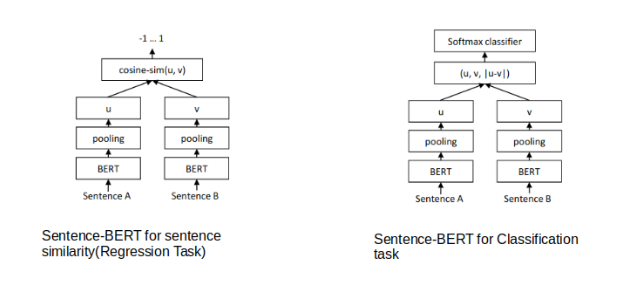

We can install Sentence BERT using:

In [ ]:
# !pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Step 1:
We will then load the pre-trained BERT model. There are many other pre-trained models available.

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Step 2:
We will then encode the provided sentences. We can also display the sentence vectors

In [ ]:
sentence_embeddings = sbert_model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [ 2.07715511e-01 -5.08164149e-03  1.96157897e+00 -2.06673056e-01
 -2.54174583e-02  4.14883703e-01 -1.25817907e+00  8.29503894e-01
 -3.78569603e-01 -4.21866655e-01  2.80214638e-01  7.82959580e-01
  8.91004682e-01  5.30921333e-02  1.27828941e-01  1.06608167e-01
  4.87411886e-01 -2.70586133e-01  1.89428300e-01 -7.60948956e-01
 -5.01209125e-02  2.31528997e-01 -9.41673577e-01  1.30141214e-01
 -2.15184893e-02  4.30828989e-01 -2.72705257e-01  4.61000621e-01
  1.17238271e+00 -7.30051380e-03 -2.90633023e-01 -1.34497195e-01
  9.05883193e-01 -8.16391289e-01  2.21491426e-01 -8.89197230e-01
 -1.65462792e-01  2.54761338e-01 -4.34204876e-01  6.83824182e-01
 -5.26550829e-01  7.96460360e-02  6.72950625e-01  2.79282153e-01
 -6.30844980e-02  1.67101666e-01  1.04765713e+00  1.35828543e+00
  5.20906091e-01 -1.01330471e+00  1.02780926e+00 -1.05658269e+00
 -2.57637799e-01  6.63372636e-01 -6.01735175e-01  1.

Step 3: Then we will define a test query and encode it as well:

In [ ]:
query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]

Step 4:
We will then compute the cosine similarity using scipy. We will retrieve the similarity values between the sentences and our test query:

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner ; similarity =  0.70626134
Sentence =  We had a three-course meal ; similarity =  0.6379333
Sentence =  Brad came to dinner with us ; similarity =  0.5786195
Sentence =  He loves fish tacos ; similarity =  0.6081957
Sentence =  In the end, we all felt like we ate too much ; similarity =  0.40863013
Sentence =  We all agreed; it was a magnificent evening ; similarity =  0.17486157


There you go, we have obtained the similarity between the sentences in our text and our test sentence. A crucial point to note is that SentenceBERT is pretty slow if you want to train it from scratch.

Reference:
https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

# Start Reading From Here - Jordana

**Split the sentence using PunktSentenceTokenizer for to develop the "document" list. Utilised BERT sentence tranformer for embedding**

In [ ]:
import pandas as pd

In [ ]:
article = pd.read_csv("/content/sample_data/17574_article.csv")
article

,id,author,date,year,month,topic,article
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i..."


In [ ]:
# # Loading PunktSentenceTokenizer using English pickle file
tokenizer = nltk.data.load('tokenizers/punkt/PY3/english.pickle')

In [ ]:
# Function to tokenize a single article
def tokenize_article(text):
    return tokenizer.tokenize(text)

In [ ]:
article['split_sentence'] = article['article'].apply(lambda x: tokenize_article(x))
article

,id,author,date,year,month,topic,article,split_sentence
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor i..."


In [ ]:
# Apply the len function to calculate the size of each list in 'tokenized_article'
article['tokenized_article_size'] = article['split_sentence'].apply(lambda x: len(x))

# Now you have a new column 'tokenized_article_size' containing the size of each list of tokens
print(article['tokenized_article_size'])


0    31
Name: tokenized_article_size, dtype: int64


In [ ]:
for sentence in article['split_sentence']:
    print(sentence)

['SEOUL, South Korea  ?', 'A special prosecutor investigating the corruption scandal that led to President Park  ?s impeachment summoned the de facto head of Samsung for questioning on Wednesday, calling him a bribery suspect.', 'The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury.', 'Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.', 'He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money.', 'Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations.', 'Neither Samsung nor M

In [ ]:
sentence_embeddings = sbert_model.encode(article['split_sentence'])

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

Sample BERT embedding vector - length 768


In [ ]:
query = "How many charges of coercing on Ms. Choi"
query_vec = sbert_model.encode([query])[0]

In [ ]:
for sent in article['split_sentence']:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  ['SEOUL, South Korea  ?', 'A special prosecutor investigating the corruption scandal that led to President Park  ?s impeachment summoned the de facto head of Samsung for questioning on Wednesday, calling him a bribery suspect.', 'The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury.', 'Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.', 'He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money.', 'Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations.', 'Neither S

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article['split_sentence']:
    # Encode each tokenized sentence using SBERT model
    for tokenized_sent in sent_list:
        sent_embedding = sbert_model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = It asked the National Assembly to file a perjury complaint against Mr. Lee, which would authorize the special prosecutor to open an investigation of that charge.; similarity = 0.6040630340576172
Top 2 Sentence = Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations.; similarity = 0.5766208171844482
Top 3 Sentence = Allegations that Ms. Park helped Ms. Choi extort millions in bribes from Samsung and other companies are at the heart of the corruption scandal that led to the National Assembly?s vote to impeach her last month.; similarity = 0.575027346611023
Top 4 Sentence = The reference on Wednesday to possible perjury charges against Mr. Lee stemmed from that testimony.; similarity = 0.537574052810669
Top 5 Sentence = Asked whether investigators would seek to arrest Mr. Lee on bribery charges, a spokesman for the special prosecutor?s office, Lee   said, ?All possibilities are open.; sim

**Using N-gram list for to develop the "document" list. Utilised BERT sentence tranformer for embedding**

In [ ]:
# !pip install sentence-transformers # comment once installed it

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
article = pd.read_csv("/content/sample_data/17574_article.csv")
article

,id,author,date,year,month,topic,article
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i..."


In [ ]:
import numpy as np
import nltk
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import nltk
nltk.download('punkt')  # Ensure punkt tokenizer is downloaded

# Function to tokenize article text by word
def tokenize_article(article_text):
    # Tokenize the article text by word
    tokens = nltk.word_tokenize(article_text.lower())  # Lowercasing for consistency

    return tokens

# Apply the tokenize_article function to each row in the 'article' column
article['word_tokenize'] = article['article'].apply(tokenize_article)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
article

,id,author,date,year,month,topic,article,word_tokenize
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[seoul, ,, south, korea, ?, a, special, prosec..."


In [ ]:
from nltk.util import ngrams

# Function to create n-grams from word tokens
def create_ngrams(word_tokens, n=10):
    # Generate n-grams
    ngram_list = list(ngrams(word_tokens, n))

    # Convert n-grams to string format
    ngram_strings = [' '.join(ngram) for ngram in ngram_list]

    return ngram_strings

# Apply the create_ngrams function to each row in the 'word_tokenize' column
article['10_grams'] = article['word_tokenize'].apply(create_ngrams)


In [ ]:
# Apply the len function to calculate the size of each list in 'tokenized_article'
article['tokenized_size_10_grams'] = article['10_grams'].apply(lambda x: len(x))

# Now you have a new column 'tokenized_article_size' containing the size of each list of tokens
print(article['tokenized_size_10_grams'])

0    786
Name: tokenized_size_10_grams, dtype: int64


In [ ]:
article

,id,author,date,year,month,topic,article,word_tokenize,10_grams,tokenized_size_10_grams
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[seoul, ,, south, korea, ?, a, special, prosec...","[seoul , south korea ? a special prosecutor in...",786


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Define a function which returns the cosine similarity between 2 vectors
def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

In [ ]:
query = "How many charges of coercing on Ms. Choi"
query_vec = sbert_model.encode([query])[0]

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article['10_grams']:
    # Encode each tokenized sentence using SBERT model
    for tokenized_sent in sent_list:
        sent_embedding = sbert_model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")


Top 1 Sentence = , state prosecutors indicted ms. choi on charges of coercing; similarity = 0.7989645600318909
Top 2 Sentence = prosecutors indicted ms. choi on charges of coercing 53 big; similarity = 0.7590687870979309
Top 3 Sentence = been looking into possible bribery charges against not only ms.; similarity = 0.7197688221931458
Top 4 Sentence = charges against not only ms. park but the businesses ,; similarity = 0.7144906520843506
Top 5 Sentence = state prosecutors indicted ms. choi on charges of coercing 53; similarity = 0.7123777270317078


# Using Sentence Transformers without tokenizing by words instead by sentences.

  Install Sentence Transformer library

In [1]:
!pip install -U sentence-transformers # comment once installed it

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Import dependencies

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util # used for text encoding and sentence embedding
import torch # used for identifying index with highest similarity score
import spacy # used for processing and analyzing text data, and retrieving most relevant text passages
import numpy as np

Prepare source data

In [ ]:
article_example = pd.read_csv("/content/sample_data/17574_article.csv")
article_example

,id,author,date,year,month,topic,article
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i..."


# Load Sentence Transformer Models

We already imported specific modules and classes from the sentence-transformers library, using:

Now, we load specific SentenceTransformer models. Here, we load four different pre-trained models:

*   'paraphrase-MiniLM-L6-v2'
*   'multi-qa-MiniLM-L6-cos-v1'
*   'all-MiniLM-L6-v2'
*   'sentence-transformers/paraphrase-distilroberta-base-v1'

In [ ]:
# Load pre-trained models
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
#model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
model = SentenceTransformer('all-MiniLM-L6-v2')
# model = SentenceTransformer('sentence-transformers/paraphrase-distilroberta-base-v1')
# model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
# query = "Who is the vice chairman of Samsung"
query = "How many charges of coercing on Ms. Choi"
# query = "How much money did Samsung contribute to Ms. Choi's foundations, according to the article?"
query_vec = model.encode([query])[0]

# Sentence Tokenization using sent_tokenize from NLTK
The code snippet uses sent_tokenize function from NLTK library. The sent_tokenize function is used to segment a given text into a list of sentences.


#### Reference:
https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize

# Function to tokenize a single article
def tokenize_sentence(text):
    return sent_tokenize(text)

article_example['split_sentence'] = article_example['article'].apply(lambda x: tokenize_sentence(x))
article_example

,id,author,date,year,month,topic,article,split_sentence
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor i..."


In [ ]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence'].apply(lambda x: len(x)))


0    31
Name: split_sentence, dtype: int64


In [ ]:
# sentence_embeddings = model.encode(article_example['split_sentence'])

In [ ]:
# def calculate_similarity_scores(query_vec, sent_embedding):
#     question_embedding = model.encode(query_vec)
#     similarity_scores = util.pytorch_cos_sim(question_embedding, sent_embedding)
#     return similarity_scores

def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



KeyError: 'split_sentence'

In [ ]:
# import spacy

# # Load the English language model
# nlp = spacy.load("en_core_web_sm")

# # Get the top 1 entry from similarities
# top_entry = similarities[0][0]

# # Process the top entry sentence with spaCy
# doc = nlp(top_entry)

# # Extract named entities from the processed sentence
# named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# # Filter named entities that are "ORG" (organization)
# org_entities = [ent[0] for ent in named_entities if ent[1] == "ORG"]

# # Filter named entities that are "PERSON" (person)
# person_entities = [ent[0] for ent in named_entities if ent[1] == "PERSON"]

# print("Named Entities:", named_entities)
# print("Organization Entities:", org_entities)
# print("Person Entities:", person_entities)


In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Sample documents (you can replace these with your own data)
# documents = [
#     "Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday.",
#     "In November, state prosecutors indicted Ms. Choi on charges of coercing 53 big businesses, including Samsung.",
#     # Add more relevant documents here...
# ]

# # Query
# query = "Who is the vice chairman of Samsung"

# # Initialize the TF-IDF vectorizer
# vectorizer = TfidfVectorizer()

# # Fit and transform the documents
# tfidf_matrix = vectorizer.fit_transform(documents)

# # Transform the query
# query_vector = vectorizer.transform([query])

# # Calculate cosine similarity between query and documents
# similarities = cosine_similarity(query_vector, tfidf_matrix)

# # Get the index of the most similar document
# most_similar_index = similarities.argmax()

# # Retrieve the exact answer
# exact_answer = documents[most_similar_index]

# print("Exact Answer:", exact_answer)


In [ ]:
# def highlight_answer(context_sentence, answer):
#     # Find the start index of the answer in the context sentence
#     start_index = context_sentence.lower().find(answer.lower())

#     # If the answer is found in the context sentence
#     if start_index != -1:
#         # Calculate the end index of the answer
#         end_index = start_index + len(answer)

#         # Construct the highlighted sentence
#         highlighted_sentence = (
#             context_sentence[:start_index] +   # Text before the answer
#             "\033[1m" + answer + "\033[0m" +  # Highlighted answer
#             context_sentence[end_index:]       # Text after the answer
#         )
#         return highlighted_sentence
#     else:
#         return None

# # Example usage
# query = "Who is the vice chairman of Samsung"
# context_sentence = "The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor's office, which recommended that he also be investigated on suspicion of perjury."

# # Highlight the answer
# highlighted_answer = highlight_answer(context_sentence, "Jay Y. Lee, the vice chairman of Samsung")
# if highlighted_answer:
#     print("Highlighted Answer:", highlighted_answer)
# else:
#     print("Answer not found in the context sentence.")


Highlighted Answer: The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor's office, which recommended that he also be investigated on suspicion of perjury.


# Sentence Tokenization Using spaCy

spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython

# Reference:
https://www.kaggle.com/code/satishgunjal/tokenization-in-nlp#Tokenization-Techniques-


In [ ]:
# !pip install spacy
# !python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Load English model from spacy
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
# sbd = nlp.create_pipe('sentencizer')

# Add component to the pipeline
nlp.add_pipe('sentencizer')

# Function to tokenize sentences using spaCy
def tokenize_sentence_spacy(text):
    doc = nlp(text)
    # return [sent.text for sent in doc.sents]
    cleaned_sentences = []
    for sent in doc.sents:
        # Remove "?" and trailing spaces
        cleaned_sent = sent.text.replace('?', "").strip()
        cleaned_sentences.append(cleaned_sent)
    return cleaned_sentences

# # Apply the tokenize_sentence_spacy function to create a new column
# article_example['split_sentence_spacy'] = article_example['article'].apply(tokenize_sentence_spacy)
# article_example



In [ ]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence_spacy'].apply(lambda x: len(x)))

0    32
Name: split_sentence_spacy, dtype: int64


In [19]:
string1 = "This is the first sentence. London is the capital city of U.K. This is the third sentence."

doc = nlp(string1)

for sent in doc.sents:
  print(sent)

This is the first sentence.
London is the capital city of U.K. This is the third sentence.


In [3]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
sentences = ['This framework generates embeddings for each input sentences',
             'Sentences are passed as a list of string.']

embeddings = model.encode(sentences)

print(embeddings[0])

[-2.90909968e-02 -6.45442382e-02  1.21190422e-03  6.10545138e-03
  3.88997942e-02  1.25892535e-01  1.92166846e-02 -3.79738696e-02
  3.18476148e-02 -8.80297497e-02  1.54010663e-02 -3.52807269e-02
  6.39602467e-02  3.00691836e-02 -8.02128613e-02  7.64655396e-02
  6.60971366e-03  5.81456199e-02 -4.83591184e-02 -9.57849845e-02
 -3.40218283e-02  6.62078634e-02  4.13762070e-02 -5.39757758e-02
 -3.79839167e-02  3.04782595e-02 -4.53962982e-02 -6.10880204e-04
  9.93949324e-02  1.77467465e-02  4.81557176e-02 -3.67677063e-02
  1.38411587e-02  8.19191337e-02 -1.15947367e-03  1.44899059e-02
 -4.85330075e-03  3.34433690e-02 -5.68923093e-02 -1.48412166e-02
 -3.86508256e-02 -1.17086256e-02  2.95987222e-02  2.72596795e-02
  8.85645896e-02 -2.67378073e-02 -8.84471387e-02 -1.42272031e-02
 -2.92088576e-02  3.57448906e-02 -9.42557976e-02 -4.90654111e-02
  2.59611639e-03  2.65179500e-02 -1.33846384e-02 -4.09330707e-03
 -1.09876981e-02 -1.05443010e-02  2.35432200e-02 -4.54079472e-02
 -1.94536299e-02 -6.73696

In [8]:
import numpy as np
def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

In [9]:
sentence1 = "This is the first sentence"
sentence2 = "This is the second sentence"
sentence3 = "I like to eat apple"

emb1 = model.encode(sentence1)
emb2 = model.encode(sentence2)
emb3 = model.encode(sentence3)

print(cosine(emb1,emb2))
print(cosine(emb2, emb3))

0.88713276
0.12005739


## Using Cosine Similarities

In [ ]:
def cosine(query, document):
  return np.dot(query,document) / (np.linalg.norm(query) * np.linalg.norm(document))

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence_spacy']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")


# Combine the top 5 sentences into a single paragraph
combined_paragraph = ' '.join([sent for sent, _ in top_5_sentences])

# Print the combined paragraph
print("Combined Paragraph:")
print(combined_paragraph)


# For cosine similarity, the interpretation is slightly different compared to Euclidean distance.
# In cosine similarity, the larger the value, the more similar the vectors are to each other.

# Cosine similarity measures the cosine of the angle between two vectors,
# which ranges from -1 to 1. A cosine similarity of 1 indicates that the vectors are perfectly aligned and
# point in the same direction, while a value of -1 indicates that they are perfectly anti-aligned.
# A value of 0 means the vectors are orthogonal (perpendicular) to each other.

# In practical terms:

# A cosine similarity close to 1 indicates high similarity between vectors.
# A cosine similarity close to 0 indicates low similarity or orthogonality between vectors.
# A cosine similarity close to -1 indicates high dissimilarity or anti-alignment between vectors.


Top 1 Sentence = In November, state prosecutors indicted Ms. Choi on charges of coercing 53 big businesses, including Samsung, to contribute $69 million to her two foundations.; similarity = 0.6965742111206055
Top 2 Sentence = Allegations that Ms. Park helped Ms. Choi extort millions in bribes from Samsung and other companies are at the heart of the corruption scandal that led to the National Assembly's vote to impeach her last month.; similarity = 0.5518270134925842
Top 3 Sentence = The special prosecutor has been investigating whether Samsung gave its support to Ms. Choi in exchange for a decision by the   National Pension Service to support a contentious merger of two Samsung affiliates in 2015.; similarity = 0.5142052173614502
Top 4 Sentence = Unlike the other corporate contributors, it went beyond support for the foundations, signing an $18 million contract with a sports management company that Ms. Choi ran in Germany, to fund a program for training Korean equestrians, which mainl

In [ ]:
# when we cleaned the sentence for instance remove trailing spaces and replace "?" to "'", the score had improve to 0.627 to 0.643

## Using Euclidean distance Similarities

In [ ]:
import numpy as np

def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence_spacy']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = euclidean_distance(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=False)

# Get the top 5 entries
top_5_sentences = similarities[:10]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")

# Yes, in the context of Euclidean distance, the smaller the distance,
# the closer the two vectors are to each other in the vector space.

# Euclidean distance is a measure of the straight-line distance between two points in a multidimensional space.
# So, if the Euclidean distance between two vectors is smaller, it indicates that the vectors are closer to each other,
# or more similar in terms of their positions in the space.

# In many applications, especially in clustering or classification tasks,
# smaller Euclidean distances often indicate higher similarity between vectors.
# However, it's important to note that the interpretation of "better" or "closer" depends on
# the specific context and task you are working on.
# Sometimes larger distances may also be meaningful, depending on the problem you're solving.


Top 1 Sentence = The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor's office, which recommended that he also be investigated on suspicion of perjury.; similarity = 0.8447601199150085
Top 2 Sentence = Mr. Lee effectively runs Samsung, South Korea's largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems.; similarity = 0.8498483896255493
Top 3 Sentence = The national pension fund's support was crucial for the merger, which analysts said helped Mr. Lee inherit control of Samsung from his father.; similarity = 0.9294878840446472
Top 4 Sentence = The special prosecutor has been investigating whether Samsung gave its support to Ms. Choi in exchange for a decision by the   National Pension Service to support a contentious merger of two Samsung affiliates in 2015.; similarity = 0.9582934975624084
Top 5 Sentence = He is expected to be asked whether   donations that S

In [ ]:
# import torch
# from transformers import BertForQuestionAnswering, BertTokenizer

# #Model
# model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad',return_dict=False)

# #Tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

# # def fine_tune_bert_qa(train_dataset):
# #     # Load pre-trained BERT model and tokenizer
# #     model_name = 'bert-base-uncased'
# #     tokenizer = BertTokenizer.from_pretrained(model_name)
# #     model = BertForQuestionAnswering.from_pretrained(model_name)

# #     # Fine-tune BERT on the question answering dataset
# #     # (You would need to define your training procedure using train_dataset)

# #     return model, tokenizer

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# encoding = tokenizer.encode_plus(text=query,text_pair=combined_paragraph)

# inputs = encoding['input_ids']  #Token embeddings
# sentence_embedding = encoding['token_type_ids']  #Segment embeddings
# tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens


In [ ]:
# start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

In [ ]:
# start_index = torch.argmax(torch.tensor(start_scores, dtype=torch.float))
# end_index = torch.argmax(torch.tensor(end_scores, dtype=torch.float))

# answer = ' '.join(tokens[start_index:end_index+1])

<ipython-input-48-bc3c4d456e81>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  start_index = torch.argmax(torch.tensor(start_scores, dtype=torch.float))
<ipython-input-48-bc3c4d456e81>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  end_index = torch.argmax(torch.tensor(end_scores, dtype=torch.float))


In [ ]:
# corrected_answer = ''

# for word in answer.split():

#     #If it's a subword token
#     if word[0:2] == '##':
#         corrected_answer += word[2:]
#     else:
#         corrected_answer += ' ' + word

# print(corrected_answer)

 53


In [ ]:
import torch
from transformers import BertForQuestionAnswering, BertTokenizer

#Model
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad',return_dict=False)

#Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

encoding = tokenizer.encode_plus(text=query,text_pair=combined_paragraph)

inputs = encoding['input_ids']  #Token embeddings
sentence_embedding = encoding['token_type_ids']  #Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

start_index = torch.argmax(torch.tensor(start_scores, dtype=torch.float))
end_index = torch.argmax(torch.tensor(end_scores, dtype=torch.float))

answer = ' '.join(tokens[start_index:end_index+1])


corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


53
 53


<ipython-input-50-f508b433420e>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  start_index = torch.argmax(torch.tensor(start_scores, dtype=torch.float))
<ipython-input-50-f508b433420e>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  end_index = torch.argmax(torch.tensor(end_scores, dtype=torch.float))


In [ ]:
# import torch
# from transformers import BertForQuestionAnswering, BertTokenizer
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# # Function to tokenize sentences using spaCy
# def tokenize_sentence_spacy(text):
#     doc = nlp(text)
#     cleaned_sentences = []
#     for sent in doc.sents:
#         # Remove "?" and trailing spaces
#         cleaned_sent = sent.text.replace('?', "'").strip()
#         cleaned_sentences.append(cleaned_sent)
#     return cleaned_sentences

# def question_answer(query):
#     # Get top-ranked sentence
#     top_sentence, _ = get_top_ranked_sentence(query)  # Assuming you have a function to get the top-ranked sentence

#     # Initialize BERT model and tokenizer for question answering
#     model_name = 'bert-large-uncased-whole-word-masking-finetuned-squad'
#     model_bert = BertForQuestionAnswering.from_pretrained(model_name)
#     tokenizer = BertTokenizer.from_pretrained(model_name)

#     # Tokenize the query and the paragraph (top-ranked sentence)
#     encoding = tokenizer.encode_plus(text=query, text_pair=top_sentence, return_tensors="pt")

#     # Perform question answering
#     start_scores, end_scores = model_bert(input_ids=encoding['input_ids'], token_type_ids=encoding['token_type_ids'])

#     # Get answer indices
#     start_index = torch.argmax(torch.tensor(start_scores, dtype=torch.float))
#     end_index = torch.argmax(torch.tensor(end_scores, dtype=torch.float))

#     answer = ' '.join(tokens[start_index:end_index+1])

#     # start_index = torch.argmax(start_scores)
#     # end_index = torch.argmax(end_scores) + 1

#     # Decode the answer from token indices
#     answer_tokens = encoding["input_ids"].numpy()[0][start_index:end_index]
#     answer = tokenizer.decode(answer_tokens)

#     return answer

# def get_top_ranked_sentence(query):
#     # Tokenize the query
#     query_vec = model.encode([query])[0]

#     # List to store tuples of (sentence, similarity)
#     similarities = []

#     # Loop through each tokenized sentence in the 'split_sentence' column
#     for sent_list in article_example['split_sentence_spacy']:
#         # Encode each tokenized sentence using all mini LM model
#         for tokenized_sent in sent_list:
#             sent_embedding = model.encode([tokenized_sent])[0]

#             # Calculate similarity between query vector and sentence embedding
#             sim = cosine_similarity(query_vec.reshape(1, -1), sent_embedding.reshape(1, -1))[0][0]

#             # Append the tuple of (sentence, similarity) to the list
#             similarities.append((tokenized_sent, sim))

#     # Sort the list based on similarities in descending order
#     similarities.sort(key=lambda x: x[1], reverse=True)

#     # Get the top-ranked sentence
#     top_sentence, top_similarity = similarities[0]

#     return top_sentence, top_similarity

# # Example usage:
# query = "Who is the vice chairman of Samsung?"
# answer = question_answer(query)
# print("Answer:", answer)


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TypeError: new(): invalid data type 'str'

In [ ]:
# # Dummy question answering dataset
# train_dataset = [
#     {'question': 'Who is the vice chairman of Samsung?', 'sentence': "The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor.'"},
#     # Add more samples as needed
# ]

# # Fine-tune BERT on the dummy dataset
# model, tokenizer = fine_tune_bert_qa(train_dataset)

# # Example usage: Extract short answers for a given question
# question = "Who is the vice chairman of Samsung?"
# long_sentence = "The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor.'"
# short_answer = extract_short_answer(question, long_sentence, model, tokenizer)
# print("Short answer:", short_answer)





Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


AttributeError: 'str' object has no attribute 'detach'

# Sentence Tokenization using re

# Reference:
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/



In [ ]:
import re

# Function to tokenize sentences using spaCy
def tokenize_sentence_re(text):
  return re.compile('[.!?] ').split(text)

# Apply the tokenize_sentence_spacy function to create a new column
article_example['split_sentence_re'] = article_example['article'].apply(tokenize_sentence_re)
article_example

,id,author,date,year,month,topic,article,split_sentence,split_sentence_spacy,split_sentence_re
0,17574,Choe Sang-Hun,11/03/2017,2017,3,business,"SEOUL, South Korea ? A special prosecutor i...","[SEOUL, South Korea ?, A special prosecutor i...","[SEOUL, South Korea , A special prosecutor in...","[SEOUL, South Korea , A special prosecutor ..."


In [ ]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence_re'].apply(lambda x: len(x)))

0    53
Name: split_sentence_re, dtype: int64


In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence_re']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money; similarity = 0.7564887404441833
Top 2 Sentence = Choi on charges of coercing 53 big businesses, including Samsung, to contribute $69 million to her two foundations; similarity = 0.7291738986968994
Top 3 Sentence = Samsung gave the largest donations to Ms; similarity = 0.668557345867157
Top 4 Sentence = Samsung also contributed $1; similarity = 0.6397005319595337
Top 5 Sentence = Choi?s foundations, totaling $17 million; similarity = 0.6182396411895752


# Sentence Tokenization using Gensim - DEPRECATED

It is an open-source library for unsupervised topic modeling and natural language processing and is designed to automatically extract semantic topics from a given document.

# Reference:
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

In [ ]:
!pip install gensim==3.8.0
import gensim

ImportError: cannot import name 'Mapping' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
import gensim==3.8.0
print(gensim.__version__)

SyntaxError: invalid syntax (<ipython-input-22-3f2fd8c95c8c>, line 1)

In [ ]:
from gensim.summarization.textcleaner import split_sentences

# Function to tokenize sentences using spaCy
def tokenize_sentence_gensim(text):
  return split_sentences(text)

# Apply the tokenize_sentence_spacy function to create a new column
article_example['split_sentence_gensim'] = article_example['article'].apply(tokenize_sentence_gensim)
article_example

ImportError: cannot import name 'Mapping' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
# Apply the len function to calculate the size of each list in 'split_sentence'
print(article_example['split_sentence_gensim'].apply(lambda x: len(x)))

0    30
Name: split_sentence_gensim, dtype: int64


In [ ]:
# List to store tuples of (sentence, similarity)
similarities = []

# Loop through each tokenized sentence in the 'split_sentence' column
for sent_list in article_example['split_sentence_re']:
    # Encode each tokenized sentence using all mini LM model
    for tokenized_sent in sent_list:
        sent_embedding = model.encode([tokenized_sent])[0]

        # Calculate similarity between query vector and sentence embedding
        sim = cosine(query_vec, sent_embedding)

        # Append the tuple of (sentence, similarity) to the list
        similarities.append((tokenized_sent, sim))

# Sort the list based on similarities in descending order
similarities.sort(key=lambda x: x[1], reverse=True)

# Get the top 5 entries
top_5_sentences = similarities[:5]

# Print the top 5 sentences with their cosine similarities
for i, (sent, sim) in enumerate(top_5_sentences, start=1):
    print(f"Top {i} Sentence = {sent}; similarity = {sim}")



Top 1 Sentence = Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury; similarity = 0.6851760745048523
Top 2 Sentence = Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems; similarity = 0.6232082843780518
Top 3 Sentence = Lee inherit control of Samsung from his father.; similarity = 0.5655609369277954
Top 4 Sentence = Lee had ?received a request for bribery from the president and ordered Samsung subsidiaries to send bribes to destinations designated by the president; similarity = 0.5615746378898621
Top 5 Sentence = The special prosecutor has been investigating whether Samsung gave its support to Ms; similarity = 0.5614740252494812


In [ ]:
# !pip install transformers
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# Load the BiDAF model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('deepset/bert-base-cased-squad2')
model = AutoModelForQuestionAnswering.from_pretrained('deepset/bert-base-cased-squad2')

# Define a sample question and passage
# question = "What is the capital of France?"
question = "Who is the vice chairman of Samsung?"
# passage = "France, officially the French Republic, is a country primarily located in Western Europe, consisting of metropolitan France and several overseas regions and territories. Paris is the capital and most populous city of France."

passage = "SEOUL, South Korea  ?   A special prosecutor investigating the corruption scandal that led to President Park  ?s impeachment summoned the de facto head of Samsung for questioning on Wednesday, calling him a bribery suspect. The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury. Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems. He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money. Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations. Neither Samsung nor Mr. Lee responded immediately to the announcement on Wednesday. Allegations that Ms. Park helped Ms. Choi extort millions in bribes from Samsung and other companies are at the heart of the corruption scandal that led to the National Assembly?s vote to impeach her last month. Since then, Ms. Park?s powers have been suspended, and she is on trial at the Constitutional Court, which will ultimately decide whether to end her presidency. Last month, Mr. Lee testified at a National Assembly hearing that he was not involved in the decision by Samsung to make the donations. He also said that the donations were not voluntary, suggesting that the company was a victim of extortion, not a participant in bribery. The reference on Wednesday to possible perjury charges against Mr. Lee stemmed from that testimony. The special prosecutor?s office said it had evidence that Mr. Lee had ?received a request for bribery from the president and ordered Samsung subsidiaries to send bribes to destinations designated by the president. ? It asked the National Assembly to file a perjury complaint against Mr. Lee, which would authorize the special prosecutor to open an investigation of that charge. Asked whether investigators would seek to arrest Mr. Lee on bribery charges, a spokesman for the special prosecutor?s office, Lee   said, ?All possibilities are open. ? In November, state prosecutors indicted Ms. Choi on charges of coercing 53 big businesses, including Samsung, to contribute $69 million to her two foundations. They identified Ms. Park as an accomplice but stopped short of filing any charges against the businesses, all of which insisted that they were under government pressure to donate. In its impeachment bill, the National Assembly asserted that the donations were bribes, made with the expectation of political favors from the president. The special prosecutor, which took over the investigations from the state prosecutors last month, has been looking into possible bribery charges against not only Ms. Park but the businesses, particularly Samsung. Ms. Park cannot be indicted while in office. Samsung gave the largest donations to Ms. Choi?s foundations, totaling $17 million. Unlike the other corporate contributors, it went beyond support for the foundations, signing an $18 million contract with a sports management company that Ms. Choi ran in Germany, to fund a program for training Korean equestrians, which mainly benefited Ms. Choi?s daughter. Samsung also contributed $1. 3 million to a winter sports program for young athletes that Ms. Choi and her nephew ran. Also on Wednesday, the special prosecutor?s office said it had acquired a tablet computer used by Ms. Choi that contained emails she exchanged with a Samsung executive. The emails contained information about the financial support provided by Samsung, the prosecutor?s office said. The special prosecutor has been investigating whether Samsung gave its support to Ms. Choi in exchange for a decision by the   National Pension Service to support a contentious merger of two Samsung affiliates in 2015. Moon   chairman of the pension fund, was arrested last month on charges that he illegally pressured the fund to back that merger when he was South Korea?s health and welfare minister. The national pension fund?s support was crucial for the merger, which analysts said helped Mr. Lee inherit control of Samsung from his father."

# Encode the question and passage using the tokenizer
inputs = tokenizer.encode_plus(question, passage, return_tensors='pt', max_length=512, truncation=True, truncation_strategy='only_second')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']
attention_mask = inputs['attention_mask']

# Pass the encoded input through the BiDAF model
outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, return_dict=True)
start_logits = outputs.start_logits
end_logits = outputs.end_logits

# Decode the predicted start and end positions to get the answer
start_index = torch.argmax(start_logits)
end_index = torch.argmax(end_logits) + 1

input_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
answer_tokens = input_ids[0][start_index:end_index]
answer = tokenizer.decode(answer_tokens)

# Skip over any tokens before the start position or after the end position
for i, token in enumerate(answer_tokens):
    if token == tokenizer.cls_token_id:
        start_index += 1
    elif token == tokenizer.sep_token_id:
        end_index -= 1
answer_tokens = input_ids[0][start_index:end_index]

# Decode the answer tokens to get the final answer
answer = tokenizer.decode(answer_tokens)
print("Answer:", answer)

ImportError: cannot import name 'QuestionAnsweringArgs' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [ ]:
train_contexts = ["WASHINGTON  ?   Several Republican senators on Monday proposed a partial replacement for the Affordable Care Act that would allow states to continue operating under the law if they choose, a proposal meant to appeal to critics and supporters of former President Barack Obama?s signature health law. But the plan was attacked by Democrats as a step back from the Affordable Care Act?s protections, and it was unlikely to win acceptance from conservative Republicans who want to get rid of the law and its tax increases as soon as possible. If anything, the proposal  ?   by Senators Bill Cassidy of Louisiana, a medical doctor, and Susan Collins of Maine, a moderate Republican  ?   may show how difficult it will be for Republicans to enact a replacement for the Affordable Care Act. Legislation that can pass muster in the more conservative House may not win enough support in the Senate. A bill with broad appeal in the Senate may fail in the House. Under the proposal, states could stay with the Affordable Care Act, or they could receive a similar amount of federal money, which consumers could use to pay for medical care and health insurance. ?We are moving the locus of repeal to state government,? Mr. Cassidy said. ?States should have the right to choose. ? The proposal shares some features with House Republican proposals: It would encourage greater use of health savings accounts and eliminate the requirement for most Americans to have insurance or pay a tax penalty. But the option for states to keep the Affordable Care Act alive will rankle the most conservative Republicans who have been trying for nearly seven years to blow it up. ?Obamacare is flawed, failing and not fixable, and it needs to be fully repealed,? said Representative Mark Meadows of North Carolina, the chairman of the House Freedom Caucus. A stalemate between the House and Senate would leave in place Mr. Obama?s health law, but efforts by President Trump and Congress to undermine it could send health insurance markets into a tailspin. On Friday, as one of his first official acts as president, Mr. Trump signed an executive order that could allow officials to ease up on enforcement of the mandate requiring most Americans to have insurance. Supporters of the Affordable Care Act panned the   proposal. ?Millions of Americans would be kicked off their plans,    costs and deductibles for consumers would skyrocket, and protections for people with   conditions, such as cancer, would be gutted,? said the Senate Democratic leader, Chuck Schumer of New York. Ronald F. Pollack, the executive director of Families USA, a   consumer group, said the bill ?falls way short of providing the protections and coverage people have under the Affordable Care Act. ? Ms. Collins said the bill would allow states to ?keep the Affordable Care Act if it is working for their residents. ? But she predicted that most states would choose something different. Under the   bill, states could enroll people who would otherwise be uninsured in health plans providing basic coverage. These   health plans are intended to protect consumers against catastrophic medical expenses. They would cover generic versions of prescription drugs, and they would also have to cover recommended childhood immunizations without  . States would contract with one or more insurers to offer this coverage. Consumers could buy ?more robust coverage? if they want, Mr. Cassidy said, but they could be automatically enrolled, by default, in the   health plans providing basic coverage. ?A state could say, ?All those eligible are enrolled unless they choose not to be,?? he explained. This ?passive enrollment? would provide insurers with a large pool of customers, including many healthy people, without the coercion of an ?individual mandate,? Mr. Cassidy said. ?We think that we could cover more people than Obamacare,? Mr. Cassidy said, although he acknowledged that the effects of his bill had not been analyzed by the Congressional Budget Office, which serves as Capitol Hill?s official scorekeeper. If a state opts out of the Affordable Care Act, many of the federal insurance standards established under the law would no longer apply. The bill would repeal federal benefit mandates that ?often force Americans to pay for coverage they don?t need and can?t afford,? Mr. Cassidy said. But some protections would remain in place. Parents would still be allowed to keep children on their insurance until the age of 26, and insurers could not impose annual or lifetime limits on benefits. The   bill, called the Patient Freedom Act, would eliminate not only the unpopular individual mandate, but also the federal requirement for larger employers to offer coverage to   employees. Mr. Cassidy said that Senators Shelley Moore Capito of West Virginia and Johnny Isakson of Georgia, both Republicans, were also sponsors of the bill. The Senate majority leader, Mitch McConnell, Republican of Kentucky, and the No. 2 Senate Republican, John Cornyn of Texas, were sponsors of a similar bill that Mr. Cassidy introduced in 2015. But the legislative landscape is different now. Republicans in Congress can repeal the Affordable Care Act, with support from Mr. Trump. In the Senate, they will need help from Democrats to adopt a replacement because Republicans are eight votes shy of the 60 needed to stop a filibuster.",
                  "WASHINGTON  ?   Senate Democrats have one particular judge?s name in mind as they await the identity of President Trump?s Supreme Court nominee: Merrick B. Garland. Democrats and their allies remain furious that Senate Republicans refused to even consider Judge Garland, President Barack Obama?s nominee to the high court, with 10 months remaining in Mr. Obama?s second term. That deep resentment is certain to color their handling of Mr. Trump?s choice just as it has contributed to their resistance to moving quickly on Mr. Trump?s cabinet selections. All indications are that they see the forthcoming nomination as a chance to take a strong stand against the new president, since they still have the power to filibuster a Supreme Court choice  ?   at least for now. ?I haven?t seen the names,? said Senator Patrick J. Leahy, Democrat of Vermont and a veteran of multiple Supreme Court fights. ?But when they had a consensus person with Merrick Garland, every single Republican who raised their hand and solemnly swore before God to uphold the Constitution refused to follow the Constitution and even have a hearing. ? Top Democrats say they don?t intend to play ?tit for tat? with the nomination. But they say they will insist on what they consider to be a mainstream candidate capable of securing at least the 60 votes needed to thwart any filibuster. Otherwise, they promise to do whatever they can to block the nominee. ?We are not going to do what the Republicans did,? said Senator Chuck Schumer of New York, the Democratic leader, ?but if the candidate?s out of the mainstream, I can tell you I will fight and my caucus will fight tooth and nail against them. ? The chief reason that Democrats will not do what the Republicans did is that they can?t  ?   Republicans remain in the Senate majority, which last year enabled them to refuse to even schedule a hearing and now gives them control over the confirmation process. But unlike with cabinet nominees, Democrats could still employ a filibuster against a Supreme Court pick, because the high court was excluded from a 2013 change engineered by Democrats to thwart filibusters against   nominees. If Democrats hold out, Senator Mitch McConnell of Kentucky, the majority leader, will no doubt come under pressure to wipe out the possibility of filibuster against Supreme Court nominees. Given the steps Republicans were willing to take to hold open the vacancy created by the death of Antonin Scalia, Democrats believe Senate Republicans might choose to eliminate that filibuster power, too. ?All the signals are there is no limit to what they are capable of doing to give the big special interests behind them control of the court,? said Senator Sheldon Whitehouse of Rhode Island, a Democratic member of the Judiciary Committee. But Republicans are already differentiating their handling of Mr. Garland?s nomination from whatever is to come with the announcement by Mr. Trump. They argue that the situations are not comparable, given the timing of the presidential election. ?There?s a big difference between not approving a Supreme Court nominee in the middle of a highly contested presidential election, and the beginning of a   term,? Mr. McConnell said on Tuesday, noting that Republicans did not filibuster Supreme Court nominees in the first term of either President Bill Clinton or Mr. Obama. Mr. McConnell took pains on Tuesday to note that both Republicans and Democrats were invited to the White House to discuss the coming nomination with Mr. Trump as part of the requirement for seeking the Senate?s advice and consent. Many Republicans and their conservative allies would prefer not to abolish the filibuster on Supreme Court nominees, knowing that it could come back to haunt them by allowing a future Democratic majority a free hand  ?   essentially the same reason Democrats left high court nominees out of the 2013 change. It is also unclear whether Republicans would even have the votes to do so through a simple majority vote on an arcane procedural maneuver. But the question will hang over the entire confirmation fight and could force a showdown. If the Democrats filibuster, ? then I guess we?ll see what steps need to be taken at the time,? said Senator John Thune of South Dakota, a member of the Republican leadership. ?But I think the one thing that we?re committed to is getting a Supreme Court justice confirmed. ? Democrats say that one result of the stalemate over Judge Garland is that it has shown that the Supreme Court can function, though imperfectly, without a full complement of nine members, relieving the party of some guilt for keeping the court   if it comes to that over a Trump nominee. Senator Richard Blumenthal, a Connecticut Democrat who sits on the Judiciary Committee, said Democrats were also galvanized by the turnout at last weekend?s protests. He said it would serve as a unifying force for Senate Democrats. ?That swell of people and strength and spirit at the marches we had Saturday showed us we have the American populace on our side,? Mr. Blumenthal said. ?They understand the importance of the Supreme Court to those issues that brought them to the streets, principally women. ? Mr. Blumenthal said the selection of a nominee by President Trump would ?put a face and a voice? on the Supreme Court battle. But for now, the face and voice most Democrats are putting on the coming clash are those belonging to Judge Garland.",
                  "President Trump, who flew across the country on hundreds of nights during the 2016 campaign to sleep in his own bed, has now spent five straight days in the unfamiliar surroundings of the White House. His aides said privately that he seemed apprehensive about the move to his new home, but Mr. Trump has discovered there is a lot he likes. ?These are the most beautiful phones I?ve ever used in my life,? Mr. Trump said in a telephone interview Tuesday evening. ?The world?s most secure system,? he added, laughing. ?The words just explode in the air. ? What he meant was that no one was listening in and recording his words. The president sat at his desk  ?   the one used by former Presidents Barack Obama, George W. Bush, Bill Clinton, Ronald Reagan and John F. Kennedy, among others  ?   at the end of his fourth full day in office. His mornings, he said, are spent as they were in Trump Tower. He rises before 6 a. m. watches television tuned to a cable channel first in the residence, and later in a small dining room in the West Wing, and looks through the morning newspapers: The New York Times, The New York Post and now The Washington Post. But his meetings now begin at 9 a. m. earlier than they used to, which significantly curtails his television time. Still, Mr. Trump, who does not read books, is able to end his evenings with plenty of television. In between, Mr. Trump signs executive orders in the Oval Office and has meetings in the West Wing. ?They have a lot of board rooms,? he said of the White House, an apparent reference to the Cabinet Room and the Roosevelt Room. The White House is the only property that Mr. Trump has slept in that is more famous than one of his own, and he seems in awe. Although he made his name building extravagant, gilded properties, the new president has marveled to aides about the splendor of the White House and the lengths he must walk to retrieve something from a   room. His preference during the day is to work in the Oval Office. And to stare at it, still. So do his staff members and relatives. ?I?ve had people come in they walk in here and they just want to stare for a long period of time,? Mr. Trump said. Among modern American presidents, Mr. Trump may be best situated to work where he lives. For decades, he has lived in a penthouse apartment on the 58th floor of Trump Tower and taken an elevator down to the 26th floor, where he has a corner office with views of Central Park. Many presidents have complained of being cooped up inside the White House  ?   George W. Bush in particular said he missed the outdoors  ?   but Mr. Trump can go for days without breathing in fresh outside air. Mr. Trump?s wife, Melania, went back to New York on Sunday night with their    son, Barron, and so Mr. Trump has the television  ?   and his old, unsecured Android phone, to the protests of some of his aides  ?   to keep him company. That was the case after 9 p. m. on Tuesday, when Mr. Trump appeared to be reacting to Bill O?Reilly?s show on Fox News, which was airing a feature on crime in Chicago. At 9:25 p. m. Mr. Trump posted on Twitter: In the interview, Mr. Trump demurred when asked about whether it was hard having his family away from him, and he pointed to Thursday, when Mrs. Trump and Barron, who is finishing the school year in New York, are expected to return. ?They?ll come down on weekends,? Mr. Trump said. ?She?ll come down on Thursdays and stay. ? He said he was enjoying himself so far, despite his visible displeasure with the coverage of his inauguration and the first performance of his press secretary, Sean Spicer, who shouted at the news media and made numerous false statements about Mr. Trump?s inaugural crowds in the White House briefing room on Saturday. Mr. Trump and his chief strategist, Stephen K. Bannon, and his chief of staff, Reince Priebus, watched Mr. Spicer?s   on Monday while eating lunch in the West Wing dining room, where the president murmured approval of Mr. Spicer?s Monday performance and called his press secretary a ?superstar. ? His first breakfast at the White House was Saturday morning  ?   a buffet in the residence spread with fresh fruit, pastries and other treats  ?   where his adult children and their families joined him. The kitchen has been stocked with the same types of snacks that Mr. Trump had on his private plane, including Lay?s potato chips. His oldest daughter, Ivanka, and her husband, Jared Kushner, the president?s senior adviser, stayed with him in the White House through Sunday. They left for their own new home at the end of the weekend to get their children ready for their new schools. Mr. Trump has not brought along any household staff from Trump Tower, an aide said. The president spent a part of Tuesday poring over artwork from the White House collections, settling on a portrait of Andrew Jackson  ?   America?s first populist president, who has been invoked by Mr. Trump?s aides as inspiration  ?   to hang in the Oval Office. ?Now, I?m working,? Mr. Trump said in the interview, punctuating his focus by cataloging the work of the day: an executive order restarting the Keystone XL pipeline and his plans for   actions over the next days. Mr. Trump is in the meantime pondering his first break away from the White House, a potential trip to    his private club in Palm Beach, Fla. possibly the weekend of Feb. 3. Until then, he is breaking in the residence, which Mrs. Trump is still working on decorating. ?It?s a beautiful residence, it?s very elegant,? Mr. Trump said, deploying one of his highest forms of praise. ?There?s something very special when you know that Abraham Lincoln slept there,? Mr. Trump said. ?The Lincoln Bedroom, you know, was his office, and the suite where I?m staying is actually where he slept. ? Mr. Trump was referring to the White House master bedroom, which is now his own. ?Knowing all of that, it?s different, than, you know, just pure elegance and room size,? Mr. Trump said. ?There?s a lot of history. ?",
                  "? President Trump would not say whether he favors lifting sanctions imposed on Russia for its invasion of Ukraine and meddling in the election, as his British counterpart rejected such a move. ? Battle lines are forming within the Republican Party ahead of Mr. Trump?s phone call Saturday with Russia?s president, Vladimir V. Putin. ? The commander in chief said his defense secretary will ?override? his views in favor of torture. President Trump said on Friday that it was ?very early? to be talking about lifting sanctions on Russia, deflecting a question about whether he would raise the issue with Russian President Vladimir V. Putin on Saturday morning even as his British counterpart flatly rejected such a move. Speaking to reporters after a meeting with Theresa May, the British prime minister, Mr. Trump did not say whether he supports keeping sanctions that were put in place following Russia?s military involvement in Ukraine and its interference in the 2016 election. But he said he hoped to have a good relationship with Mr. Putin. ?If we could have a great relationship with Russia and with China and with all countries, I?m all for that,? Mr. Trump said in a brief answer to the question. Ms. May was more direct in her answer to the question about sanctions on Russia. She said the United Kingdom ?believes that the sanctions should continue. ? The answers highlight what could be one of the differences between the two leaders, even as both of them insisted Friday that they plan to continue the close working relationship that has long existed between the two nations. President Trump?s phone call scheduled on Saturday with Russia?s president  ?   their first conversation since Mr. Trump took office  ?   has Republicans on edge. As one of his last acts as president, Barack Obama imposed sanctions on Russia for interfering in the election to help install Mr. Trump in the Oval Office. Senator John McCain of Arizona, chairman of the Senate Armed Services Committee, warned Mr. Trump on Friday against lifting the sanctions. What came next was a list of Russian abuses: its invasion of Ukraine, its annexation of Crimea and its support of ?the murderous Assad regime as it has waged war on the Syrian people and killed more than 400, 000 civilians. ? Then came this: ?And in the most flagrant demonstration of Putin?s disdain and disrespect for our nation, Russia deliberately interfered in our recent election with cyberattacks and a disinformation campaign designed to weaken America and discredit Western values. ? UPDATE: Another Republican senator, Rob Portman of Ohio, joins in: President Trump said Friday that he will let his secretary of defense ?override? him by banning torture even though he believes the tactics do work in getting information out of terror suspects. In a remarkable show of deference to his own subordinate, Mr. Trump noted that Jim Mattis, the Pentagon chief, does not believe torture is effective. The president, who serves as the commander in chief and usually makes the final call on military action, said he will let Mr. Mattis decide. ?I don?t necessarily agree, but I will tell you that he will override because I?m giving him that power,? Mr. Trump said. ?I?m going to rely on him. I happen to feel that it does work. ? Mr. Trump appeared to be struggling about the issue even as he spoke, returning several times to his own belief in torture?s effectiveness even as he stated several times that he would let Mr. Mattis would decide. ?But I?m going with our leaders,? he said. ?We are going to win, with or without. ? Then he added: ?But I do disagree. ? President Trump spoke by phone on Friday with Enrique Pe?a Nieto, the president of Mexico, White House officials said, less than 24 hours after the Mexican president canceled a White House meeting over anger about Mr. Trump?s intentions to build a border wall. A senior White House official confirmed Friday that the call had taken place and said that an official description of what the two leaders said will be released soon. In the wake of the deepening diplomatic tensions on Thurdsday, aides to Mr. Trump had said they still intended to keep lines of communications between the two governments open. The call suggests that the two leaders may be attempting to reschedule the planned meeting. That could begin to repair the relationship in the short term, though differences will likely remain about construction of the border wall and who will finance it. Then again, Mr. Trump tweeted another salvo on Friday morning. Mr. Mattis on Friday ordered the review of the controversial   fighter jet program, which has been criticized by President Trump for its cost overruns. Mr. Mattis also ordered that plans for a new Air Force One  ?   which has also come under fire from Mr. Trump  ?  should be reviewed, ?with the specific objective of identifying means to substantially reduce the programs costs while delivering needed capabilities. ? The   review, Mr. Mattis said in a memo, will also look at how to reduce costs while still meeting requirements set out for the fighter jet program. During his confirmation hearings earlier this month, Mr. Mattis defended tweets from Mr. Trump criticizing the   program. Mr. Mattis said at the time that Mr. Trump had ?in no way shown a lack of support for the program. He just wants more bang for the buck. ? The cost of building the   fighter jet, the   Joint Strike Fighter, has been an issue at the Pentagon for several years. At an estimated $400 billion over 15 years for 2, 443 planes, the fighter jet is the military largest weapons project. Mr. Trump is just not going to give up his claim that 3 million to 5 million illegal immigrants voted for Hillary Clinton, but he?s grasping for evidence. On Friday morning, he looked to VoteStand, which calls itself ?America?s first online fraud reporting app? for the smartphone but does not appear to actually exist beyond the Twitter account of its founder, Gregg Phillips. The president seemed to be responding to an interview with Mr. Phillips on CNN Friday morning that was, shall we say, inconclusive. Mr. Phillips at once said 3 million illegal immigrants voted and said he is still working to prove that. ?You can reach a conclusion and still verify it,? he maintained. Mr. Phillips began pressing his case that 3 million illegal votes were cast shortly after Election Day in November, but pressed repeatedly, Mr. Phillips has never produced any evidence. As the debunking site Snopes. com wrote: Mr. Phillips has been adamant on Twitter of course. But as PolitiFact wrote, ?There is no report. ? And that is not all Mr. Phillips has asserted. He now has an endorsement from the president of the United States. Mr. Trump?s fallacious argument that he lost the popular vote by nearly 3 million because of illegal immigrant ballots started as the stuff of wonderment and ridicule. Now that the Trump administration has shifted to an investigation of the voter rolls, things have gotten serious. Democrats appear to be girding for battle, but if, as is likely, Senator Jeff Sessions, a conservative from Alabama, becomes the attorney general, it does not appear to be a fight that the minority can win. The Democrats fear the hunt for illegal voters will become a pretext to tighten voting requirements nationwide and bar many minority voters who tend to side with the Democrats. Even moderate Democrats are alarmed. Word from Politico is that President Trump will not be attending the fancy,   Alfalfa Club dinner Saturday night, a chummy gathering with many of Washington?s politicians, journalists and every president since Ronald Reagan. Lest we get too excited  ?   could the White House Correspondents Association dinner be next? Please?  ?   we should wait and see. It is true that every president since Mr. Reagan has attended the annual roast and silly cabaret dinner of the Alfalfa Club, a     Washington clique that seems like it was hatched from a bygone era. But not many of those presidents have attended each year. Mr. Trump may yet keep the soiree alive. Mr. Trump traveled to the City of Brotherly Love on Thursday to decry Philadelphia?s rising murder rate  ?   ?I mean, just terribly increasing. ? But it isn?t. Last year?s 277 homicides was down from 280 in 2015. That is up from 2014, when 248 were murdered, and in 2013, when 246 were killed. But recent years are markedly down from 2007 to 2012 when Philadelphia had more than 300 killings, 391 in 2007 alone. ?President Trump?s false statements today were an insult to the men and women of the Philadelphia police force  ?   the very same men and women who are working long hours today to ensure his safety,? Mayor Jim Kenney said in a statement Thursday. Of course, in the era of alternative facts, Mayor Kenney may be spitting in the wind. The Trump administration?s decision to drop advertisements encouraging people to sign up for health insurance under the Affordable Care Act was greeted with anger and alarm by supporters of the law  ?   and a recognition that Mr. Trump wants the law crippled. ?This is sabotage, pure and simple,? fumed Leslie Dach, a senior official in President Barack Obama?s Department of Health and Human Services who now heads a coalition to save the law. ?This proves that this administration doesn?t care about people who need health coverage. And it clearly shows that they now own the consequences of their efforts to undermine the health care system. ? The ads were to have run only for a few more days, until the annual open enrollment period ends on Tuesday. In the last few years, large numbers of consumers signed up just before the deadline. But Mr. Trump and Republicans in Congress are determined to repeal Mr. Obama?s signature domestic achievement. Since Nov. 1, more than 11. 5 million people have signed up for insurance or had their coverage automatically renewed. And when the enrollment period ends, it?s anyone?s guess who will announce the total number of people who would lose their insurance if the law is repealed. The leading candidate to be the Pentagon?s new spokesman is John Ullyot, a former Marine Corps intelligence officer and veteran of Capitol Hill. Mr. Ullyot served as spokesman and deputy chief of staff for two Republican senators, John W. Warner of Virginia and Arlen Specter of Pennsylvania, and as spokesman for the Senate Armed Services Committee from 2003 to 2007.",
                  "HONG KONG  ?   You might call it a Noah?s Ark for an era of melting polar ice sheets. An audacious plan to respond to climate change by building a city of floating islands in the South Pacific is moving forward, with the government of French Polynesia agreeing to consider hosting the islands in a tropical lagoon. The project is being put forward by a California nonprofit, the Seasteading Institute, which has raised about $2. 5 million from more than 1, 000 interested donors. Randolph Hencken, the group?s executive director, said work on the project could start in French Polynesia as early as next year, pending the results of some environmental and economic feasibility studies. ?We have a vision that we?re going to create an industry that provides floating islands to people who are threatened by rising sea levels,? Mr. Hencken said. The group?s original founders included Peter Thiel, a billionaire investor and prominent supporter of President Trump, although Mr. Thiel is no longer donating to the institute, Mr. Hencken said. Mr. Hencken said that the project?s pilot islands would cost a total of $10 million to $50 million and house a few dozen people and that the initial residents would most likely be   buyers from the developed world. He added that the institute was seeking to build the islands in what would be a nautical version of a special economic zone and that it would showcase innovations in solar power, sustainable aquaculture and   wind farms. The project?s leaders face many hurdles, such as building   systems for the islands and convincing investors to buy property in such an untested environment. Joe Quirk, a spokesman for the Seasteading Institute, said in a 2014 video that the cost of housing on the artificial islands would initially be on par with real estate in London or New York City. But the project also appears to show how the acceleration of climate change has prompted technology entrepreneurs to devise innovative solutions to   problems like rising sea levels. ?The oceans are the most ignored part of the planet, so I?m excited by the possibilities which will emerge when you get some of Silicon Valley?s more adventurous souls focusing on the sustainable use of our coastal and marine areas,? Lelei LeLaulu, a development entrepreneur from Samoa who specializes in the Pacific Islands and advises the International Finance Corporation on sustainable business, said in an email from French Polynesia. But the project has critics in French Polynesia and beyond. Alexandre Le Qu?r?, a radio host at the station Polyn?sie 1?re, said this month that the Seasteading Institute?s project reminded him of a plan to build artificial islands off the Indonesian resort island of Bali that has drawn heavy criticism amid concern over its projected environmental effects. ?One might think the engineers behind Seasteading have responses to these ecological questions,? Mr. Le Qu?r? said. ?Nevertheless, it doesn?t stop skepticism about this slightly crazy project. ? Mr. Hencken said that he expected the project to eventually include dozens of artificial islands and that similar projects could someday be built in other atoll nations or coastal areas threatened by rising sea levels. He added that the cost of housing would decrease as the   island platforms became cheaper to manufacture. ?I certainly don?t think this is a project that is exclusively for the wealthy,? he said, adding that his background was in social justice activism. But experts familiar with climate change and the South Pacific said they doubted the project would be feasible on a wide scale in a region with some of the world?s poorest countries. They also wondered whether the money could be better spent on education or health care. ?I wouldn?t write it off entirely I just come to these things with a healthy skepticism,? said Matthew Dornan, the deputy director of the Development Policy Center at Australian National University in Canberra. ?There is a tendency for very technologically focused solutions to the challenges in the Pacific without any real input from the Pacific Islanders themselves,? he added. Simon Donner, a geography professor at the University of British Columbia in Vancouver who studies the effects of climate change in the Pacific Islands, said that the French Polynesia project looked intriguing and that he had no reason to doubt that its backers were well intentioned. But he said the project reflected a cruel reality: The developed world is both responsible for climate change and better able to cope with it. The French Polynesia project would effectively be a ?cruise ship,? Professor Donner said. ?Meanwhile, the other actual islands in the Pacific are stuck with the impacts of climate change. ? Mr. Hencken disputed that assessment, saying it was unfair to compare his initiative with traditional aid projects. ?We?re not taking French Polynesia?s money,? he said. ?We?re investing our own money with the hopes of making a direct and indirect benefit to our host. ? The French Foreign Ministry did not respond to an emailed request for comment on the Seasteading Institute?s plan. Recent climate models predict that the world?s oceans could rise five to six feet by 2100, roughly twice the increase reported as a plausible   scenario by a United Nations panel in 2013. Atoll nations in the Pacific are seen as uniquely vulnerable to sea level rise because they are often   and extremely narrow. One of them, Kiribati, has become an unofficial champion of a movement to call global attention to the threat. In an interview with The New York Times last year, Kiribati?s president at the time, Anote Tong, said he had commissioned experts from the government of the United Arab Emirates to study the feasibility of artificially raising Kiribati?s islands as a climate adaptation strategy. But he declined to provide specifics, and subsequent attempts to reach officials in Kiribati and the United Arab Emirates for details were unsuccessful. Koen Olthuis, an architect in the Netherlands whose projects are entirely   said that interest in amphibious construction among developers and municipalities had surged worldwide in the last four years and that floating projects could potentially have an enormous range of beneficial social uses. An early example, he said, is a floating school he designed recently for Bangladesh, where sea level rise threatens   coastal communities. Mr. Olthuis said that the technical challenges of artificial island construction could be resolved and that he hoped the French Polynesia project would succeed. But it was still an open question, he added, what the ultimate goal or scale of such projects should be. ?What do we want to save? How much money do we want to spend on it, and what does it bring for those people?? he said. ?With billions, you can save 300, 000 people. But you can also take them away and put them in other countries and use those buildings to help people in slums worldwide. ?",
                  "A mishandled handoff between foremen may have played a role in an Amtrak crash last April in which two workers were killed when a train slammed into construction equipment that was on the tracks near Chester, Pa. according to documents released on Thursday. The documents, part of a continuing investigation by the National Transportation Safety Board, also revealed the train?s operator tested positive for marijuana, and show a supervisor?s distress upon hearing that the track had been cleared for use. ?Oh my gosh you?ve got to be kidding me,? John Yaeger, an Amtrak day shift foreman whose shift had just begun, told a dispatcher, according to a transcript of radio communications from that morning. ?Oh man. The backhoe got plowed. I can?t believe it. ? The documents released on Thursday do not draw conclusions about what caused the crash, though possible factors are cited. The crash occurred around 7:50 a. m. on April 3, when the train struck a backhoe that was being used during a multiday maintenance operation on a neighboring track, according to the documents. During an interview with investigators, Mr. Yaeger suggested there had been confusion in the handoff from a night foreman about whether the track had been cleared for traffic. The backhoe operator, Joseph Carter Jr. 61, and his supervisor, Peter Adamovich, 59, died.   people were taken to hospitals. The preliminary N. T. S. B. documents consist of hundreds of pages of interviews, transcripts and reports, and include the revelation that the train?s operator, Alexander Hunter, tested positive for marijuana that day. Efforts to reach Mr. Hunter on Thursday evening were not immediately successful. The train was traveling south at 106 miles per hour  ?   within the authorized limit of 110 m. p. h.  ?   when Mr. Hunter applied the emergency brakes after ?seeing something? on Main Track 3, according to the documents. He was able to slow the train to only 88 m. p. h. before striking the backhoe. ?The collision obliterated the backhoe, sending pieces of the equipment throughout the area and into the west side of the first passenger coach,? according to an analysis report. Amtrak estimated the damage at $2. 5 million.",
                  "CAPE CANAVERAL, Fla.  ?   Back in his days as a test pilot at   Air Force Base in Ohio, Gus Grissom had a message for his wife, Betty. ?If I die, have a party,? he said. Betty Grissom never did have that party. But on Friday, as for the past 25 years, there was a solemn observance at the   memorial for her husband and two crewmates who were killed in the Apollo 1 disaster. Mr. Grissom, Roger Chaffee and Ed White died in a flash fire that engulfed their capsule atop a Saturn 1B rocket during a routine training operation on Jan. 27, 1967. Mr. Grissom was 40. Ms. Grissom, 89, was at the memorial again on Friday, wearing a denim jacket with a large Apollo 1 patch in patriotic colors. She joined old friends, family members, and NASA officials and veterans, among them Charlie Duke, who took part in the Apollo 16 moon landing. With the recent deaths of the astronauts John Glenn and Eugene A. Cernan and the sea changes in Washington, the gathering felt like a memorial for an era as well as for three men. At the ceremony, candles were lit for the dead astronauts by members of their families, including Cody Grissom, 22, a pilot, who is completing his last year at his grandfather?s alma mater, Purdue University. Representatives from the Navy, the Air Force and NASA spoke, and a Navy bugler performed taps after the sun went down. ?It is important that Challenger and Columbia are remembered, and that Apollo 1 is remembered,? said the Kennedy Space Center director, Robert D. Cabana. ?And that we take those steps that create an environment where everyone has a voice, that we really work to ensure the success and the safety of the crew as we continue to explore and move beyond our planet. ? Ms. Grissom said this year?s ceremony was probably her last. It coincided with a NASA tribute exhibit about Apollo 1 at the Kennedy Space Center, which she, like many, thought was long overdue. ?I thought this is probably a good time to call it quits with them finally getting a memorial of some kind,? she said. This year?s event drew around 150 people, one of the largest crowds ever for a memorial that few people knew of unless they were related to an astronaut or were a   space fan. ?We need heroes today, and these were heroes,? said one such fan, Robert Pearlman, an American space historian. People from all over the world traveled to the memorial, among them Masato Maruyama, 65, who has come for the past 10 years from Tokyo. He brought a big bottle of sake to share with the family and friends. Mr. Maruyama said Mr. Grissom reminded him of his father, who was in the Japanese Navy. He remembers just where he was when the fire occurred. ?It?s not the distance  ?   it?s in here,? he said, pointing to his heart. ?I?m just one of hundreds of thousands. Apollo counted a lot not just for Americans, but human beings. ? Although the launch platform is crumbling like a concrete Greek ruin, and stenciled with an eerie ?Abandon in Place,? the site was decorated with three     floral wreaths brought by the Grissom family. A bagpiper stood ready and Ms. Grissom sat front and center. She was treated as the event?s grande dame as people lined up to speak with her. ?I want you to know it is such an honor,? said Shirley Brown, whose shop provided the wreaths. ?The first time you walked in my shop and said, ?I?m Betty Grissom,? I thought Queen Elizabeth had walked in. You never went down, you fought all the way. ? ?I never quit,? Ms. Grissom agreed, in the kind of taciturn response her astronaut husband might have offered. Many years after the accident, two space buffs, Bob Castro and Mark Pinchell, started going out to the site of the fire, which is on Air Force property, in their own private tribute. One year, they bumped into each other, and came up with the idea of doing something bigger. ?Just two space geeks who were going to Pad 34 and doing their own separate ceremonies,? said Mark Grissom, 63, who was 13 when his father died. ?They met at the pad and decided to invite the families. ? The Grissoms were the first astronaut family to become involved. Early on, car headlights provided the only illumination. While other astronauts and families have been absent over the years, this year Roger Chaffee?s wife, Martha, and her daughter, Sheryl, attended, along with Ed White?s daughter Bonnie. ?This is the families? memorial,? said Sonny Witt, the 45th Space Wing director of operations for Division 1 at Patrick Air Force Base, who helps provide the access. ?Not the Air Force and not NASA. They are the ones that lost the husbands and brothers and fathers. Mistakes were made, and they paid the price. ? When the three Apollo 1 astronauts were trapped in their burning capsule on Pad 34, a cry for help, believed to be from Mr. Chaffee, a rookie astronaut, came over the communications system: ?Hey, we?re burning up. ? Mr. White tried opening the hatch, but caught within the highly combustible pure oxygen atmosphere, the crew suffocated. ?I don?t want any of this forgotten,? Ms. Grissom said. ?Gus Grissom was a human being. ? Mr. Grissom, often seen as an underdog, was a favorite astronaut of many Americans. He infamously ?screwed the pooch?  ?   as Tom Wolfe put it in ?The Right Stuff?  ?   when the hatch blew on his Mercury capsule, causing it to sink it in the Atlantic upon splashdown. Mr. Grissom was initially blamed, and the sunken capsule cost the astronaut couple a visit to the Kennedy White House. In the end, he was cleared of responsibility. Ms. Grissom, who lives in Houston by herself, and Mr. Grissom were high school sweethearts in Mitchell, Ind. Her life always revolved around him. She worked as a   telephone operator for Indiana Bell, putting her husband through college at Purdue, where he studied mechanical engineering on the G. I. Bill. He was selected as an astronaut after flying an   Sabre on over a hundred combat missions in Korea. Death was always on the horizon for the wives. The program lost seven astronauts on the path to the moon, largely as a result of crashes of the   the supersonic jet trainer airplanes the astronauts flew back and forth from where they lived in Houston and Cape Canaveral. When the news of the Apollo 1 accident came to her, delivered by a NASA doctor when she was at a friend?s home for a weekly poker night, Ms. Grissom told her friend that she had ?already died 100, 000 deaths? living with her husband. Martha Chaffee, the youngest space widow, slept with the flag that hung over her husband?s coffin at Arlington. Pat White killed herself years later, a weekend before she and some of the other wives had a reunion planned, her friends said. The space widows felt rejected after their husbands died, while still living in the closely knit community of astronaut families in the ?space burbs? by the Manned Spacecraft Center (later the Johnson Space Center) in Houston, nicknamed ?Togethersville? because of its exclusivity. In the late ?60s, Ms. Grissom became a black sheep among the astronaut community. She was the first of the widows to sue NASA?s largest contractor, North American Rockwell, over the construction of the capsule, and she inspired Ms. Chaffee and Ms. White to do the same. Ms. Grissom eventually settled for $350, 000. On Friday, as Ms. Grissom was helped off the old launching pad, professional and amateur stargazers pointed out the International Space Station passing in the sky above, along with Venus and a shooting star. Back in the car and about to be driven to a celebratory dinner for friends and family at a hotel in nearby Cocoa Beach, she turned to her son and said, ?The stars are out tonight. ? Earlier, she spoke of how her husband?s sacrifice helped pave the way for the missions to come like the Apollo 11 moonwalk her husband never got to see. Still, she said, ?I?m pretty sure he got to the moon before they did. ? She added: ?Of course he didn?t make it, but in spirit I think he was already there. ?",
                  "On a chilly October morning, Talea Childs, 4, still dressed in pajamas, bounced along the living room rug of a United States map. ?Konnichiwa,? she greeted in Japanese, and bowed. Surrounded by shelves of her favorite books, she selected a thin volume and sat to read. ?She?s been interested in books since she could belly over and look at the pages,? her mother, Trenicia Childs, said as Talea settled into the story. Ms. Childs is applying to kindergarten for next year  ?   a notoriously rigorous process in New York City schools  ?   and nurtures her daughter?s learning at home. A schedule taped to a cupboard by the kitchen lists Circle Time,   Storytelling, Cooking and other activities. Brushes, thick with paint, sit in a canister by the sink, and evidence of recent art projects lines the walls  ?   abstract strokes of pinks, purples and green glitter. Also on the walls are posters of the solar system, the human body, the numbers through 100 and the words ?large,? ?small,? ?run? and ?walk? and associated words. While Talea read in the corner, Ms. Childs sorted through piles of housing documents. The Childses, who are among almost 565, 000 people in New York State who receive some public assistance, according to state calculations in June, never expected to need help. Ms. Childs, 45, and her husband, Tarrell Childs, 40, an Air Force veteran, have college degrees and work force experience. While serving in the military for a decade as an account finance specialist, Mr. Childs worked through an injury in 1997 that gouged and blinded his right eye. A Bronx native, he returned there in 2003, working full time while studying English literature at Fordham University. He wrote short stories, plays and short film scripts late into the night. The couple met at Moca Bar and Lounge at a spoken word performance in Harlem in 2010. Mr. Childs wondered aloud what their children would be like on their second date. A year later they were married and expecting their daughter. With Mr. Childs?s steady income as a property manager, Ms. Childs postponed completing her master?s in education to raise their daughter. She was one certification shy of graduation. But Mr. Childs lost his job in 2014 when his company restructured because of financial problems. ?That?s when we really started getting behind,? Ms. Childs said. With his G. I. Bill benefits set to expire, Mr. Childs dusted off his screenplays and applied to the New York Film Academy. He got in. He planned to work while going to school, but he found that an accelerated yearlong conservatory program packed with   days did not allow for extra time. Although the military covered his studies, the family exhausted its meager savings. With little time to search for jobs during school, Mr. Childs graduated in September 2015 without work. That month, bringing in just $594. 98 in disability payments from Veterans Affairs, the Childses applied for public assistance, confronting a frustrating labyrinth of city departments and aid applications, according to documents provided by the family. They hoped the assistance would be temporary  ?   keeping food on the table and bills paid on time  ?   until they gained   employment. In October 2015, a month after they applied for aid, the city?s Human Resources Administration lost their paperwork. A month after that, the Homelessness Diversion Units forced them to reapply. And a month after that: the same story. Their debt quadrupled while they waited for paperwork to be fixed, and they faced imminent eviction after missing rent payments, the family said. With a worsened financial situation, the family was told that December that its rent was too high and its arrears too steep to qualify for assistance from the Homelessness Diversion Units, so it was referred to the Neighborhood Association for   Affairs, a nonprofit organization providing housing intervention and assistance services. That same month, the Childses found out they had qualified for public assistance through the Human Resources Administration. But two days later, another error closed their case, halting all public assistance, including food stamps. In early 2016, the Human Resources Administration reopened the case, and the family reapplied to the Neighborhood Association for   Affairs. But a week later the nonprofit denied the application. Eventually, in February, the Human Resources Administration referred the family for an eviction prevention subsidy. ?It felt personal,? Ms. Childs said. ?It was one more stressor when there were already weeks we didn?t have enough food on the table. ? In March, HomeBase, an eviction prevention program administered by Catholic Charities Archdiocese of New York, one of the eight organizations supported by The New York Times Neediest Cases Fund, helped them navigate the complicated application process  ?   which included another errant application closing in April  ?   and avoid eviction. By this time, the family was $12, 193. 46 in arrears. ?It?s right out of a Kafka novel,? said Alice Kenny, the organization?s director of special projects. In May, Catholic Charities got the city to help settle the Childs family?s arrears with a lump sum of $12, 083. 46. Then in June, nine months after initially applying for a housing subsidy, they received their first payment, along with another conciliation notice threatening case closure. The family resolved the notice and now receives $960 a month toward rent from the city. Still, despite noting Mr. Childs?s veteran status in September 2015, the family was not referred to the proper office for public assistance for more than a year. Last summer, Mr. Childs got a job as a substitute teacher. Working toward a teaching license while interning on film projects, he anticipates additional film work this year. In January, he began a work training program at a martial arts school in the Bronx, learning to become an instructor. Ms. Childs also temporarily worked at a   job with the federal Women, Infants and Children program. She has also taught English to children in their Bronx neighborhood and plans to return to school to study early childhood education and later open a toddler education program, based on the family?s educational approach at home. The family brings in $950 monthly, and currently has about $2, 000 in rent arrears. HomeBase provided the family with $340 in July to buy a dresser and a toddler bed for Talea. Then in September, Catholic Charities provided $162. 85 in Neediest Cases funds to cover the cost of Talea?s school clothes and bedding. Through public assistance, the family can use child care centers that are suggested and subsidized by the city. The family tried several of those education programs last year, but the workload and environment were not stimulating, Ms. Childs said, so she enrolled Talea at a Montessori school, where the family receives financial aid, in late October and doubled her efforts at home. The Childses have applied to five independent schools, where they believe Talea could thrive next school year, but the costs  ?   estimated at $25, 000 to $45, 000 annually  ?   are high. They have applied for financial aid to the schools through Early Steps, a nonprofit intended to increase diversity within kindergarten and   classrooms in independent schools. Talea will find out in February if she is accepted to any of the schools. At night, the family dresses up and improvises plays, which Mr. Childs records. Many end in life lessons.   is not one of them. While sitting on a park bench on a recent   outing, Ms. Childs said, she had a conversation with another mother who did not agree that everyone deserved the same chances. Unaware that the Childs family receives welfare, the woman depicted recipients as sloths sitting at home, sending their children to overpriced day care centers. ?But is that who we are?? Ms. Childs asked, recalling the conversation. ?The assumption is if you?re on public assistance, you don?t want to work. Yes, we receive a check every month. But we also work and are involved in our kid?s life. We?re working hard to make something of ourselves. So, no, that?s not who we are at all. ?"
                  ]

In [ ]:
len(train_contexts)

8

In [ ]:
train_questions_answers = [
    {
        "context_index": 0,
        "question": "who is Senators Bill Cassidy of Louisiana?",
        "answer": "Senators Bill Cassidy of Louisiana, a medical doctor"
    },
    {
        "context_index": 0,
        "question": "who is the chairman of the House Freedom Caucus?",
        "answer": "Representative Mark Meadows of North Carolina"
    },
    {
        "context_index": 1,
        "question": "who is in the Judiciary Committee?",
        "answer": "Senator Patrick J. Leahy, Democrat of Vermont and Senator Richard Blumenthal, a Connecticut Democrat"
    },
    {
        "context_index": 1,
        "question": "how many votes needed to thwart any filibuster?",
        "answer": "60 votes"
    },
    {
        "context_index": 2,
        "question": "what are the morning newspapers?",
        "answer": "The New York Times, The New York Post and now The Washington Post"
    },
    {
        "context_index": 2,
        "question": "what is airing on Fox News?",
        "answer": "Fox News, which was airing a feature on crime in Chicago"
    },
    {
        "context_index": 2,
        "question": "who is Trump press sectrary?",
        "answer": "his press secretary, Sean Spicer"
    },
    {
        "context_index": 3,
        "question": "who is the President of Russia?",
        "answer": "Russian President Vladimir V. Putin"
    },
    {
        "context_index": 3,
        "question": "who is the British prime minister?",
        "answer": "Theresa May, the British prime minister"
    },
    {
        "context_index": 3,
        "question": "how many civilians were killed under Assad regime?",
        "answer": "400,000 civilians"
    },
    {
        "context_index": 3,
        "question": "how long is the Strike Fighter program?",
        "answer": "At an estimated $400 billion over 15 years"
    },
    {
        "context_index": 4,
        "question": "how much world ocean could rise?",
        "answer": "world's oceans could rise five to six feet by 2100"
    },
    {
        "context_index": 4,
        "question": "who is Koen Olthuis?",
        "answer": "Koen Olthuis, an architect in the Netherlands"
    },
    {
        "context_index": 4,
        "question": "who is geography professor at the University of British Columbia?",
        "answer": "Simon Donner"
    },
    {
        "context_index": 5,
        "question": "Where is Amtrak crash?",
        "answer": "Chester, Pa"
    },
    {
        "context_index": 5,
        "question": "When is the Amtrak crash occured?",
        "answer": "occurred around 7:50 a. m. on April 3"
    },
     {
        "context_index": 5,
        "question": "How much is Amtrak crash estimated?",
        "answer": "Amtrak estimated the damage at $2. 5 million"
    },
     {
        "context_index": 6,
        "question": "who were killed in the Apollo 1 disaster?",
        "answer": "Mr. Grissom, Roger Chaffee and Ed White died in a flash fire that engulfed their capsule atop a Saturn 1B rocket"
    },
     {
        "context_index": 6,
        "question": "who is Kennedy Space Center director?",
        "answer": "Robert D. Cabana"
    },
     {
        "context_index": 6,
        "question": "where is Cody Grissom finishing his last year?",
        "answer": "Purdue University"
    },
     {
        "context_index": 7,
        "question": "How old is Talea Childs?",
        "answer": "4"
    },
    {
        "context_index": 7,
        "question": "Who is Tarell Childs?",
        "answer": "an Air Force veteran"
    },
    {
        "context_index": 7,
        "question": "what language did Ms. Childs teach to children in Bronx neighborhood?",
        "answer": "English"
    }
]

In [ ]:
train_data = []
train_contexts_data = []

for i, context in enumerate(train_contexts):
    qas = []
    for qa in train_questions_answers:
        if qa["context_index"] == i:
            answer_start = context.find(qa["answer"])
            if answer_start != -1:
                qas.append({
                    "id": str(len(qas) + 1).zfill(5),
                    "is_impossible": False,
                    "question": qa["question"],
                    "answers": [
                        {
                            "text": qa["answer"],
                            "answer_start": answer_start,
                        }
                    ],
                })
    train_contexts_data.append({
        "context": context,
        "qas": qas,
    })

train_data.extend(train_contexts_data)

In [ ]:
# train_contexts_data

In [ ]:
# train_data

In [ ]:
import json

with open('news_data_train.json', 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

In [ ]:
# Setting up testing data

In [ ]:
test_contexts = [
    "BANJUL, Gambia  ?   A week after he was inaugurated in another country, Adama Barrow landed in Gambia on Thursday afternoon, setting foot inside his own national borders for the first time as the new president. Throngs of supporters, some holding Gambian flags, lined the roads to greet Mr. Barrow, who had flown in from Dakar, Senegal, where he had fled more than a week earlier out of security concerns after his predecessor, Yahya Jammeh, refused to step down. As he entered Banjul, the capital, Mr. Barrow, dressed in all white, poked out of a white Land Cruiser surrounded by military vehicles and waved to onlookers. ?Today is freedom day,? said Mariama Bah, a nurse from Serekunda, a town nearby, who came to the airport to welcome President Barrow. ?We now have a president that we can be proud of. ? Mr. Barrow defeated the longtime president, Mr. Jammeh, in a surprising outcome to an election in December. Mr. Jammeh, who had been in power since 1994, when he led a successful coup, initially accepted defeat. A few days after the vote, he changed his mind, declared the election results invalid and vowed to use the power of his military to stay in charge. It took repeated personal overtures from West African presidents and finally a regional coalition of troops that crossed into Gambia to persuade Mr. Jammeh, known for human rights abuses, to step down. He flew out of the country on Saturday, accompanied by a cargo plane containing his   and other luxury automobiles, and has settled in Equatorial Guinea, which has its own record of human rights violations. Mr. Barrow?s arrival capped a tense period for many Gambians who had feared a bloody end to the presidential standoff. Tens of thousands of residents had been so worried that they fled the country, though many have already returned. But Mr. Jammeh still has supporters left in Gambia, and some residents worry that divisions could lead to problems in the new administration. Mr. Barrow has dismissed his predecessor?s supporters as a minority. Most of all, many residents said they were weary of the regional troops who were still roaming the capital. They had arrived at the statehouse to search it and make sure all was safe for Mr. Barrow?s return, but their presence on the streets was unsettling to many. Mr. Barrow?s aides said the soldiers were likely to remain in Gambia for weeks as the new administration makes the transition. Some Gambians worried that it was still too early for Mr. Barrow to come home. ?Yahya Jammeh was not acting alone,? said Ishmael Ceesay, 24, a mobile phone salesman in Serekunda. ?His people are still around. ? Mr. Barrow?s aides said the president would stay at a private residence until the regional troops finished securing the statehouse. Mr. Jammeh?s rule penetrated the psyche of many Gambians who feared him, so much so that thousands fled years ago. Their departure further damaged an already shaky economy that Mr. Barrow has said will be a priority for him. Mr. Jammeh jailed journalists and his opponents, some of whom died in prison, carried out hunts for people believed to be witches and forced patients to stop taking medication so he could test what he said was his homemade cure for AIDS  ?   herbs, prayers and a banana. Residents of Gambia talked about Mr. Jammeh only in hushed tones, and rarely in public, and even some members of the diaspora said they were convinced he was monitoring their communications. Mohamed Jalloh, who sells fabric at the entrance to the statehouse, said he had spent the past two decades praying a bullet would not come flying toward him. ?Yahya Jammeh brought so much fear in us,? Mr. Jalloh said. The paranoia was evident even this week, with Mr. Jammeh hundreds of miles away, when a Gambian newspaper reported that he had left toxins in the vents in the statehouse to poison his successor. Mr. Barrow?s team said the report was false. For many Gambians, the pain of Mr. Jammeh?s rule was all too real. Some residents said part of Mr. Barrow?s new job would be comforter in chief. Mr. Barrow has vowed to create a truth and reconciliation commission to look into injustices during Mr. Jammeh?s more than   administration. On Wednesday afternoon in Brikama, the region where Mr. Barrow received the most votes, three women sat on a long wooden bench. They wore yellow #GambiaHasDecided   a motto adopted by the opposition that wanted Mr. Jammeh to leave. Like many others across Gambia, each of the women said a relative had been killed by security forces loyal to Mr. Jammeh. As they sold sugar at the market, the three spoke of their losses. It was during the 2011 presidential election campaign that Nyima Jabang?s father, an ambulance driver, was tortured and killed while in custody at the National Intelligence Agency. His crime: driving two men to a hospital who had been wounded at a rally in a clash between Mr. Jammeh?s party and the main opposition party, the United Democratic Party. The next day, the brother of Nyima Sanyang, another of the friends selling sugar, was arrested by security forces in connection with the campaign clash and was beaten to death. The third woman, Bintu Sonko, 30, described the long, speeding motorcades that carried Mr. Jammeh and his aides, who would toss packets of cookies to supporters. In 2013, Ms. Sonko?s son, Lamine, 7, heard Mr. Jammeh?s cars approaching. He ran out with his friends to wave to the passing president. Lamine darted into the street to catch a cookie and was struck and killed by a car in the motorcade. ?They did not even stop,? Ms. Sonko said. ?They kept going and throwing cookies at the rest of the kids. We can?t even report the matter to the chief or the police. ? ?That was my only child. ?",
    "WASHINGTON  ?   As President Trump signed a sweeping executive order on Friday, shutting the borders to refugees and others from seven largely Muslim countries, the secretary of homeland security was on a White House conference call getting his first full briefing on the global shift in policy. Gen. John F. Kelly, the secretary of homeland security, had dialed in from a Coast Guard plane as he headed back to Washington from Miami. Along with other top officials, he needed guidance from the White House, which had not asked his department for a legal review of the order. Halfway into the briefing, someone on the call looked up at a television in his office. ?The president is signing the executive order that we?re discussing,? the official said, stunned. The global confusion that has since erupted is the story of a White House that rushed to enact, with little regard for basic governing, a core campaign promise that Mr. Trump made to his most fervent supporters. In his first week in office, Mr. Trump signed other executive actions with little or no legal review, but his order barring refugees has had the most explosive implications. Passengers were barred from flights to the United States, customs and border control officials got instructions at 3 a. m. Saturday and some arrived at their posts later that morning still not knowing how to carry out the president?s orders. ?The details of it were not thought through,? said Stephen Heifetz, who served in the Justice and Homeland Security Departments, as well as the C. I. A. under the previous three presidents. ?It is not surprising there was mass confusion, and I expect the confusion and chaos will continue for some time. ? Stephen K. Bannon, the chief White House strategist, oversaw the writing of the order, which was done by a small White House team, including Stephen Miller, Mr. Trump?s policy chief. But it was first imagined more than a year ago, when Mr. Trump, then a candidate for the Republican nomination, reacted to terrorist attacks in San Bernardino, Calif. by calling for a ?total and complete shutdown of Muslims entering the United States. ? In the months that followed, Mr. Trump?s campaign tried to back away from the proposal, which was seen by Democrats as    campaign rhetoric that would never be reality. Mr. Trump offered few details as the campaign progressed, and as   he promised to protect the country from terrorists with only vague promises of ?extreme vetting. ? But Mr. Bannon, who believes in highly restrictive immigration policies and saw barring refugees as vital to shoring up Mr. Trump?s political base, was determined to make it happen. He and a small group made up of the president?s closest advisers began working on the order during the transition so that Mr. Trump could sign it soon after taking office. A senior administration official said that the order was drafted in cooperation with some immigration experts on Capitol Hill and members of the ?beachhead teams?  ?   small groups of political appointees sent by the new White House to be liaisons and begin work at the agencies. James Jay Carafano, a vice president of the conservative Heritage Foundation and a member of Mr. Trump?s transition team, said that little of that work was shared with career officials at the Homeland Security Department, the State Department or other agencies. There was ?a firewall between the old administration and the incoming one,? Mr. Carafano said. One reason, he said, is that when the Trump transition team asked pointed questions suggesting new policies to the career officials, those questions were swiftly leaked to the news media, generating negative stories. So the Trump team began to limit the information they discussed with officials from the previous administration. ?Why share it with them?? Mr. Carafano said. R. Gil Kerlikowske, who served as commissioner of Customs and Border Protection under former President Barack Obama, said that his staff had little communication with Mr. Trump?s transition team, who made no mention of a bar on entry for people from certain countries. White House officials in the meantime insisted to reporters at a briefing that Mr. Trump?s advisers had been in contact with officials at the State and Homeland Security Departments for ?many weeks. ? One official added, ?Everyone who needed to know was informed. ? But that apparently did not include members of the president?s own cabinet. Jim Mattis, the new secretary of defense, did not see a final version of the order until Friday morning, only hours before Mr. Trump arrived to sign it at the Pentagon. Mr. Mattis, according to administration officials familiar with the deliberations, was not consulted by the White House during the preparation of the order and was not given an opportunity to provide input while the order was being drafted. Last summer, Mr. Mattis sharply criticized Mr. Trump?s proposed ban on Muslim immigration as a move that was ?causing us great damage right now, and it?s sending shock waves through the international system. ? Customs and Border Protection officers were also caught unaware. They contacted several airlines late Friday that were likely to be carrying passengers from the seven countries and ?instructed the airlines to offload any passport holders from those countries,? said a state government official who has been briefed on the agency?s actions. It was not until 3 a. m. on Saturday that customs and border officials received limited written instructions about what to do at airports and border crossings. They also struggled with how to exercise the waiver authority that was included in the executive order, which allowed the homeland security secretary to let some individuals under the ban enter the country case by case. One customs officer, who declined to be quoted by name, said he was given a limited briefing about what to do as he went to his post on Saturday morning, but even managers seemed unclear. People at the agency were blindsided, he said, and are still trying to figure things out, even as people are being stopped from coming into the United States. ?If the secretary doesn?t know anything, how could we possibly know anything at this level?? the officer said, referring to Mr. Kelly. At the Citizenship and Immigration Service, staff members were told that the agency should stop work on any application filed by a person from any of the countries listed in the ban. Employees were told that applicants should be interviewed, but that their cases for citizenship, green cards or other immigration documents should be put on pause, pending further guidance. The timing of the executive order and the lack of advance warning had homeland security officials ?flying by the seat of their pants,? to try to put policies in place, one official said. By Saturday, as the order stranded travelers around the world and its full impact became clear, Reince Priebus, the chief of staff, became increasingly upset about how the program had been rolled out and communicated to the public. By Sunday morning, Mr. Priebus had to defend the immigration ban on NBC?s ?Meet the Press,? where he insisted that the executive order was rolled out smoothly. He also backpedaled on the policy and said that the executive order?s restrictions on entry to the United States would not apply to legal permanent residents ?going forward. ? As White House officials also insisted on Sunday that the order had gone through the usual process of scrutiny and approval by the Office of Legal Counsel, the continuing confusion forced Mr. Kelly to clarify the waiver situation. He issued a statement making clear that lawful permanent residents  ?   those who hold valid green cards  ?   would be granted a waiver to enter the United States unless information suggested that they were a security threat. But senior White House officials insisted on Sunday night that the executive order would remain in force despite the change, and that they were proud of taking actions that they said would help protect Americans against threats from potential terrorists. That assertion is likely to do little to calm the public furor, which showed no signs of waning at the beginning of Mr. Trump?s second full week in the Oval Office. Mr. Carafano said he believed that the substance of Mr. Trump?s executive order was neither radical nor unreasonable. But he said that Mr. Trump?s team could have delayed signing the order until they had better prepared the bureaucracy to carry it out. He also said the president and his team had not done a good job of communicating to the public the purpose of the executive order. ?If there is a criticism of the administration, and I think there is, I think they have done a rotten job of telling their story,? he said. ?It is not like they did not know they were going to do this. To not have a cadre of people out there defending the administration  ?   I mean, really guys, they should have done this. ?",
    "Good morning. (Want to get California Today by email? Here?s the  .) Let?s turn it over to Thomas Fuller, our San Francisco bureau chief, for today?s introduction. More than four decades ago California passed a landmark law protecting the state?s farmworkers from abuse and helping them to organize. But the recent resignation of the head of a board that oversees the implementation of the law highlights the extent to which organized labor among farmworkers has collapsed since the days of the pioneering labor leader Cesar Chavez. Chavez?s activism was instrumental in the creation of the Agricultural Labor Relations Act in 1975, the passage of which Gov. Jerry Brown described as a major accomplishment of his first stint as governor. In his recent resignation letter, the head of the board, William B. Gould IV, described the law as ?irrelevant to farmworkers. ? He estimated that less than one percent of the agricultural work force is now represented by a union. As chairman of the Agricultural Labor Relations Board, Mr. Gould was charged with overseeing the certification process of union elections. Yet Mr. Gould said virtually no workers came to the board during his tenure. ?During the entire three years that I was chairman of the board there was only one petition for representation filed by a union in the state of California,? he said. Mr. Gould says a major factor for the decline of organized farm labor is the fear that undocumented workers have of dealing with the government. Around half of the Californian agricultural work force is in the country illegally. ?There is not only no incentive to complain but there is no incentive to become involved with government in any way,? Mr. Gould said. California?s agricultural industry is bigger than ever. It produces roughly a third of all fruits and vegetables grown in the United States and has about a third of the nation?s farmworkers. Philip Martin, a specialist on organized farm labor, paints a less stark picture than Mr. Gould of the plight of farmworkers. Farmworker wages ?have gone up significantly,? Mr. Martin said, and some workers have the benefit of voluntary agreements that growers sometimes enter with their suppliers. The average hourly wage of farmworkers in California is around $12, he said, above the state?s current minimum wage of $10. Mr. Martin, a professor emeritus at the University of California, Davis, says estimates on unionization rates among farmworkers in California are not very reliable because there are no government requirements to report them. But he says it is undeniable that unionization rates have plummeted from the heyday of union power in the late 1970s. ?There?s not near the union activity that there used to be,? he said. Student groups at U. C. Berkeley had vowed to disrupt the scheduled appearance of a controversial,   speaker. And on Wednesday, as the speaker, Milo Yiannopoulos, an editor at Breitbart News, was set to appear, protesters delivered on the promise, setting fires and throwing objects at buildings. The police canceled the event before it could begin, and buildings on the campus were locked down for several hours. Mr. Yiannopoulos condemned the outcome. ?One thing we do know for sure,? he said on Facebook, ?the Left is absolutely terrified of free speech and will do literally anything to shut it down. ? On Thursday morning President Trump responded on Twitter, appearing to defend Mr. Yiannopoulos and threaten the university?s funding: (Please note: We regularly highlight articles on news sites that have limited access for nonsubscribers.) ? What a diverse California says about the future of political strife in the rest of the United States. [The New York Times] ? A federal judge in Los Angeles blocked part of President Trump?s travel ban. [The New York Times] ? The Sierra Nevada snowpack is the biggest in 22 years  ?   and more snow is on the way. [The Mercury News] ? ?I have found no other country that aligns more with my view of the future than New Zealand,? wrote Peter Thiel. [The New York Times] ? Snapchat?s idea: Your online identity is not a compilation of everything you?ve ever done, but ?who I am right now. ? [The New York Times] ? The big wave contest Titans of Mavericks was thrown into doubt after organizers filed for bankruptcy. [San Francisco Chronicle] ? Oakland?s mayor said the city would not subsidize a Raiders stadium. [East Bay Times] ? San Francisco?s Millennium Tower is still sinking, and residents may get stuck with the repair bill. [Bloomberg] ? ?About a third of all California renters today are paying more than 50 percent of their income in rent. ? [KQED] ? What $1. 9 million buys in Santa Barbara, Denver and suburban Philadelphia. [The New York Times] ? A hummingbird egg has stalled a project to upgrade a Bay Area bridge. [The Associated Press] ? Movie review: ?Water  Power: A California Heist? makes the case that water is becoming the new oil. [The Salt Lake Tribune] The country?s largest Ikea is opening Wednesday in Burbank. To help grasp the vastness of the home furnishing emporium, some numbers:  8   ?   approximate number of football fields that could fit in the store 19  ?   buildings razed to make room for it 600  ?   seats in the restaurant 30  ?   checkout lanes  1, 700  ?   parking spaces Countless  ?   shoppers sure to get lost in the store?s labyrinthine layout A photographer for The Burbank Leader took a tour. Take a look. Want to submit a photo for possible publication? You can do it here. California Today goes live at 6 a. m. Pacific time weekdays. Tell us what you want to see: CAtoday@nytimes. com. The California Today columnist, Mike McPhate, is a   Californian  ?   born outside Sacramento and raised in San Juan Capistrano. He lives in Davis. Follow him on Twitter. California Today is edited by Julie Bloom, who grew up in Los Angeles and attended U. C. Berkeley.",
    "WASHINGTON  ?   The document carried the title ?A Roadmap to Repeal,? a concise list of Obama administration environmental regulations that a Koch   group was pressing President Trump and Congress to quickly reverse after Inauguration Day. It was a tally of rules that energy industry executives and lobbyists had waged a futile fight against for eight years, donating millions of dollars to lawmakers who vowed to help block them, filing lawsuits to try to overturn them and hiring experts to generate reports that questioned the need for them. But in a flurry of activity this past week, Congress did what Charles G. and David H. Koch  ?   who own a conglomerate that sells hundreds of products, including gasoline, jet fuel and coal  ?   and other industry leaders had been asking for. Using a rarely invoked law, the   Congress nullified a measure intended to curb the venting of gas wells on federal lands, and began the process of rolling back other regulations, including one enacted to limit damage that coal mines cause to streams  ?   each items on the ?Roadmap to Repeal. ? On Friday, with his own executive orders, Mr. Trump took up two more items on the list, including a call to rewrite major provisions of the   Act, legislation crafted by the Obama administration and passed by Congress in response to the 2008 financial meltdown. Not since the Reagan administration has Washington moved so quickly to roll back or nullify so many federal regulations, one of the clearest signs of an abrupt shift of power in a government now under   control that has flipped the script of winners and losers. ?It is a big, fat victory, after all this time,? said Luke Popovich, a vice president at the National Mining Association, an industry trade group. A   alliance has now been formed among Congress, the Trump administration and industries that struggled to reverse what they saw as an    rush to regulate by the Obama administration. This new alignment of power is causing alarm among not only environmental groups but also other  ?   mostly liberal  ?   advocates who have spent much of the past eight years pushing for new rules to cover Wall Street banks, broadband providers, teacher preparation requirements, prepaid credit cards and even companies that sell   foods in vending machines. All of these measures, and many others, now stand a chance of being reversed, watered down or blocked. ?For the last several years, whenever Congress would concoct some way to roll back a rule protecting clean air or clean water or undermine the fight against climate change, we always felt confident as we had an adult in charge at the White House,? said Michael Brune, executive director of the Sierra Club, an environmental group. ?Now, what used to be a wish list of the oil and coal and gas industry has become the   list for Congress and the White House. ? For Republicans, these first moves are the easy part, made possible by a law that gives Congress the power to reverse regulations within 60 legislative days with a simple majority vote in the House and Senate. Other Republican efforts to exploit this    law  ?   which until this week had been used only once to nullify a new rule  ?   were thwarted five times with vetoes by President Obama since 2015. Once the   window expires, Republicans will have a harder time reversing Mr. Obama?s regulations, but will still have tools at their disposal, including cutting financing for the enforcement of rules, issuing new rules that are weaker, or negotiating with Democrats to pass new legislation. They have bold ambitions, including rescinding a rule enacted by the Obama administration that could close dozens of coal burning power plants, and another that would extend overtime pay eligibility to an estimated four million Americans. At a private meeting on Thursday hosted by the National Association of Manufacturers, a trade group, a senior White House adviser provided a plan on how the administration would handle efforts to curtail environmental regulations beyond the initial rush now underway to nullify recently adopted rules, said an energy industry executive who participated in the meeting and spoke on the condition of anonymity because details were confidential. Industry advocates and their allies in Congress said the   moves toward deregulation was good for consumers and the economy, as they simply wanted to eliminate measures that they believed cost jobs and drove up prices. Among the regulations being targeted: the methane rule, an Interior Department measure meant to reduce   flaring, when gas leaking from wells is burned off like a giant blow torch. ?Even on the way out the door, the former administration?s regulatory onslaught continued as they pushed through more midnight regulations,? the Senate majority leader, Mitch McConnell, Republican of Kentucky, said on Wednesday, as he urged his colleagues to reverse the coal mining regulation, known as the Stream Buffer Rule. ?Fortunately, with a new president, we now have the opportunity to give the American people relief and our economy a boost. ? Lobbyists for the   extraction industry  ?   oil, gas, coal and other mining operations  ?   said they were as surprised as anyone else by the outcome of the November election, which gave them new clout in Washington. ?A lot of us folks just did not anticipate we were going to be doing this,? said Stephen Brown, a lobbyist at Tesoro, an oil refining and marketing company based in San Antonio. ?It was like the dog that caught up with the UPS truck. ? Within days of the election, conference calls and meetings between industry lobbyists, members of Mr. Trump?s transition teams and key Republican staff members on Capitol Hill were taking place. Those who took part began to plot out which regulations they wanted to go after first, participants in the process said. Energy rules quickly ended up at the top of the list. Mr. Obama was unusually aggressive in using his regulatory powers to expand the reach of the federal government over the energy industry, after failing to win the support he needed in Congress to pass legislation to take similar steps. But the energy industry spends about $300 million a year lobbying Congress, deploying an army of three lobbyists for each member. It also contributed more than $160 million during the most recent election cycle to federal candidates, with 80 percent of that going to Republicans, according to a tally by the Center for Responsive Politics, a nonprofit group. And the industry now wanted congressional leaders like Mr. McConnell, who is from one of the country?s top   states, to nullify the Obama administration?s new rules. ?This has been a   press to block these rules, from a legal standpoint, a policy standpoint and a political standpoint,? said Bret Sumner, an oil and gas industry lawyer, who serves on the board of the Western Energy Alliance, a trade group that has aggressively lobbied Congress to block Obama administration regulations governing drilling on federal lands. Mr. Sumner?s group, along with the American Petroleum Institute and other major industry trade associations and individual companies and the U. S. Chamber of Commerce, all pressed congressional leaders to immediately repeal the methane rule, which the Interior Department finalized in November. The measure, according to the department, would force companies to prevent the release of gas via flaring or leaks, eliminating an estimated 180, 000 tons a year of methane gas, a contributing factor in climate change, while also increasing federal revenue by as much as $10 million a year, as the energy companies pay royalties only on fuel they contain and then sell. For its part, the coal industry pushed Congress to reverse the Stream Buffer Rule, also drafted by the Interior Department, that prevented mining companies from cutting off mountaintops in search of coal and other commodities, then dumping the remaining debris into nearby valleys. The department predicted the rule would protect 6, 000 miles of streams and an estimated 52, 000 acres of forests over the coming two decades. ?It did not take a big pitch,? said Hal Quinn, president of the National Mining Association, of his group?s lobbying effort targeting congressional leaders to get its measure on the repeal list. ?We clearly reinforced the fact this is ripe and due for Congress to reassert its power. ? A third rule targeted for quick repeal was one adopted by the Securities and Exchange Commission that required oil, gas and mining companies to disclose payments made to foreign governments for development rights  ?   a provision intended to prevent corruption in places like Africa and Latin America. Billions of dollars from such payments have disappeared over the past several decades, at times siphoned by government officials for their personal use, instead of being used to improve the standard of living in these often impoverished nations. Exxon Mobil, whose former chief executive, Rex Tillerson, just became secretary of state, was one of the provision?s primary opponents. He argued that the rule would force the company to disclose ?commercially sensitive information? and make it harder to compete against certain foreign oil companies that do not need to comply. By Friday, both the House and Senate had approved the first two of these repeals  ?   on the stream rule and the foreign government payments  ?   and final action by the Senate approving the repeal of the methane gas rule is expected soon. Mr. Trump has already put out a memo welcoming the rule reversals by Congress. ?The administration strongly supports the actions taken by the House to begin to nullify unnecessary regulations imposed on America?s businesses,? said a statement issued by the White House on Wednesday. The push to repeal these rules has created moments of obvious frustration for Democrats on the floor of the House and Senate chambers. As the blitz began this past week, Democratic lawmakers used various props  ?   like   photographs of fish harmed by mining industry practices  ?   to try to make their points. Senator Ed Markey, Democrat of Massachusetts, arrived on the chamber floor with a mock ?Wheel of Fortune? board, with slivers marked ?coal,? ?mining? and ?even more oil? indicating the available prizes that Congress was offering. ?Let?s consult our wheel to see who is the big winner of the G. O. P. giveaway this week,? Mr. Markey said, essentially conceding that Senate Democrats were all but certain to lose many of these fights. But for Freedom Partners  ?   the secretive club of hugely wealthy political donors led and organized by the Koch brothers  ?   it was a week to celebrate, as there had been a great deal of progress on their ?Roadmap to Repeal? list. James Davis, an executive vice president at the group, sent a message late on Friday declaring ?these repeal bills will soon be on their way to President Trump for his signature. ?"
]

test_questions_answers = [
    {
        "context_index": 0,
        "question": "what is the capital of Gambia?",
        "answer": " Banjul, the capital"
    },
     {
        "context_index": 0,
        "question": "who is the nurse from Serekunda?",
        "answer": "Mariama Bah"
    },
     {
        "context_index": 1,
        "question": "who is Ishmael Cessay?",
        "answer": "a mobile phone salesman in Serekunda"
    },
     {
        "context_index": 1,
        "question": "who served in the Justice and Homeland Security Departments?",
        "answer": "Stephen Heifetz"
    },
     {
        "context_index": 2,
        "question": "how long is Mr. Gould As chairman of the Agricultural Labor Relations Board?",
        "answer": "3 years"
    },
     {
        "context_index": 2,
        "question": "who is the professor emeritus at the University of California, Davis?",
        "answer": "Philip Martin"
    },
     {
        "context_index": 3,
        "question": "who is vice president at the National Mining Association?",
        "answer": "Luke Popovich"
    },
     {
        "context_index": 3,
        "question": "what is Sierra Club?",
        "answer": "Sierra Club, an environmental group"
    },
     {
        "context_index": 3,
        "question": "where is Tesoro?",
        "answer": "San Antonio, Texas."
    },
     {
        "context_index": 3,
        "question": "what board was Bret Sumner served?",
        "answer": "Western Energy Alliance"
    }
]

In [ ]:
test_data = []
test_contexts_data = []

for i, context in enumerate(test_contexts):
    qas = []
    for qa in test_questions_answers:
        if qa["context_index"] == i:
            answer_start = context.find(qa["answer"])
            if answer_start != -1:
                qas.append({
                    "id": str(len(qas) + 1).zfill(5),
                    "is_impossible": False,
                    "question": qa["question"],
                    "answers": [
                        {
                            "text": qa["answer"],
                            "answer_start": answer_start,
                        }
                    ],
                })
    test_contexts_data.append({
        "context": context,
        "qas": qas,
    })

test_data.extend(test_contexts_data)

In [ ]:
with open('news_data_test.json', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)

In [ ]:
# training for fine tuning

In [ ]:
import json

with open(r"news_data_train.json", "r") as read_file:
    train = json.load(read_file)

with open(r"news_data_test.json", "r") as read_file:
    test = json.load(read_file)

In [ ]:
# test[0]

{'context': 'BANJUL, Gambia  ?   A week after he was inaugurated in another country, Adama Barrow landed in Gambia on Thursday afternoon, setting foot inside his own national borders for the first time as the new president. Throngs of supporters, some holding Gambian flags, lined the roads to greet Mr. Barrow, who had flown in from Dakar, Senegal, where he had fled more than a week earlier out of security concerns after his predecessor, Yahya Jammeh, refused to step down. As he entered Banjul, the capital, Mr. Barrow, dressed in all white, poked out of a white Land Cruiser surrounded by military vehicles and waved to onlookers. ?Today is freedom day,? said Mariama Bah, a nurse from Serekunda, a town nearby, who came to the airport to welcome President Barrow. ?We now have a president that we can be proud of. ? Mr. Barrow defeated the longtime president, Mr. Jammeh, in a surprising outcome to an election in December. Mr. Jammeh, who had been in power since 1994, when he led a successful

In [ ]:
pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 

In [ ]:
import logging
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

In [ ]:
#train_args are the parameters the QuestionAnswerringModel will use
train_args = {
    'overwrite_output_dir': True,
    "evaluate_during_training": True,
    "max_seq_length": 512,
    "num_train_epochs": 15, #25, after experimentations
    "evaluate_during_training_steps": 500,
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "n_best_size":16, #batch_size is another important argument
    "train_batch_size": 8,
    "eval_batch_size": 8
}

In [ ]:
model = QuestionAnsweringModel("bert",
                               "bert-large-cased",
                               args = train_args,
                               use_cuda=True) # I will use GPU for faster performance

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.train_model(train, eval_data=test)

OutOfMemoryError: CUDA out of memory. Tried to allocate 114.00 MiB. GPU 0 has a total capacity of 22.17 GiB of which 92.88 MiB is free. Process 9359 has 22.07 GiB memory in use. Of the allocated memory 21.83 GiB is allocated by PyTorch, and 8.95 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
# Evaluate the model
result, texts = model.eval_model(test)

In [ ]:
print(result)

In [ ]:
# Load model from training checkpoint
# from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

# model = QuestionAnsweringModel("bert", "/kaggle/working/outputs/best_model")


# Make predictions with the model
to_predict = [
    {
        "context": "SEOUL, South Korea  ?   A special prosecutor investigating the corruption scandal that led to President Park  ?s impeachment summoned the de facto head of Samsung for questioning on Wednesday, calling him a bribery suspect. The de facto leader, Jay Y. Lee, the vice chairman of Samsung, will be questioned on Thursday, according to the special prosecutor?s office, which recommended that he also be investigated on suspicion of perjury. Mr. Lee effectively runs Samsung, South Korea?s largest conglomerate he is the son of its chairman, Lee   who has been incapacitated with health problems. He is expected to be asked whether   donations that Samsung made to two foundations controlled by Choi   a longtime friend of the president, amounted to bribes, and what role, if any, he played in the decision to give the money. Investigators at the special prosecutor?s office have questioned other senior Samsung executives as suspects about the bribery accusations. Neither Samsung nor Mr. Lee responded immediately to the announcement on Wednesday. Allegations that Ms. Park helped Ms. Choi extort millions in bribes from Samsung and other companies are at the heart of the corruption scandal that led to the National Assembly?s vote to impeach her last month. Since then, Ms. Park?s powers have been suspended, and she is on trial at the Constitutional Court, which will ultimately decide whether to end her presidency. Last month, Mr. Lee testified at a National Assembly hearing that he was not involved in the decision by Samsung to make the donations. He also said that the donations were not voluntary, suggesting that the company was a victim of extortion, not a participant in bribery. The reference on Wednesday to possible perjury charges against Mr. Lee stemmed from that testimony. The special prosecutor?s office said it had evidence that Mr. Lee had ?received a request for bribery from the president and ordered Samsung subsidiaries to send bribes to destinations designated by the president. ? It asked the National Assembly to file a perjury complaint against Mr. Lee, which would authorize the special prosecutor to open an investigation of that charge. Asked whether investigators would seek to arrest Mr. Lee on bribery charges, a spokesman for the special prosecutor?s office, Lee   said, ?All possibilities are open. ? In November, state prosecutors indicted Ms. Choi on charges of coercing 53 big businesses, including Samsung, to contribute $69 million to her two foundations. They identified Ms. Park as an accomplice but stopped short of filing any charges against the businesses, all of which insisted that they were under government pressure to donate. In its impeachment bill, the National Assembly asserted that the donations were bribes, made with the expectation of political favors from the president. The special prosecutor, which took over the investigations from the state prosecutors last month, has been looking into possible bribery charges against not only Ms. Park but the businesses, particularly Samsung. Ms. Park cannot be indicted while in office. Samsung gave the largest donations to Ms. Choi?s foundations, totaling $17 million. Unlike the other corporate contributors, it went beyond support for the foundations, signing an $18 million contract with a sports management company that Ms. Choi ran in Germany, to fund a program for training Korean equestrians, which mainly benefited Ms. Choi?s daughter. Samsung also contributed $1. 3 million to a winter sports program for young athletes that Ms. Choi and her nephew ran. Also on Wednesday, the special prosecutor?s office said it had acquired a tablet computer used by Ms. Choi that contained emails she exchanged with a Samsung executive. The emails contained information about the financial support provided by Samsung, the prosecutor?s office said. The special prosecutor has been investigating whether Samsung gave its support to Ms. Choi in exchange for a decision by the   National Pension Service to support a contentious merger of two Samsung affiliates in 2015. Moon   chairman of the pension fund, was arrested last month on charges that he illegally pressured the fund to back that merger when he was South Korea?s health and welfare minister. The national pension fund?s support was crucial for the merger, which analysts said helped Mr. Lee inherit control of Samsung from his father.",
        "qas": [
            {
                "question": "Who is the vice chairman of Samsung?",
                "id": "0",
            }
        ],
    }
]

answers, probabilities = model.predict(to_predict, n_best_size=2)
print(answers)